In [181]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [182]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [183]:
df = pd.read_csv("../Python/Output/FFT_4_18.txt", sep='\t')
df.head()

SinSource NoiseType  Noise Signal  Order  Freq       Test  Uncertainty Mean  \
0  IndexSin  Gaussian    0.1    Sin      4     1    Forward             0.400   
1  IndexSin  Gaussian    0.1    Sin      4     1    Reverse             0.025   
2  IndexSin  Gaussian    0.1    Sin      4     1  Roundtrip             0.100   
3  IndexSin  Gaussian    0.1    Sin      4     2    Forward             0.400   
4  IndexSin  Gaussian    0.1    Sin      4     2    Reverse             0.025   

   Uncertainty Deviation  Uncertainty Minimum  ...       1.2       1.4  \
0                    0.0                0.400  ...  0.064516  0.032258   
1                    0.0                0.025  ...  0.093750  0.031250   
2                    0.0                0.100  ...  0.000000  0.000000   
3                    0.0                0.400  ...  0.031250  0.031250   
4                    0.0                0.025  ...  0.031250  0.062500   

        1.6      1.8       2.0       2.2  2.4      2.6  2.8  3.0  
0  0.064516  0.00000  0.032258  0.032258  0.0  0.00000  0.0  0.0  
1  0.000000  0.03125  0.000000  0.000000  0.0  0.03125  0.0  0.0  
2  0.000000  0.00000  0.000000  0.000000  0.0  0.00000  0.0  0.0  
3  0.000000  0.06250  0.000000  0.000000  0.0  0.00000  0.0  0.0  
4  0.031250  0.00000  0.000000  0.000000  0.0  0.00000  0.0  0.0  

[5 rows x 46 columns]

In [184]:
df.columns

Index(['SinSource', 'NoiseType', 'Noise', 'Signal', 'Order', 'Freq', 'Test',
       'Uncertainty Mean', 'Uncertainty Deviation', 'Uncertainty Minimum',
       'Uncertainty Maximum', 'Error Mean', 'Error Deviation', 'Error Minimum',
       'Error Maximum', '-3.0', '-2.8', '-2.6', '-2.4', '-2.2', '-2.0', '-1.8',
       '-1.6', '-1.4', '-1.2', '-1.0', '-0.8', '-0.6', '-0.4', '-0.2', '0.0',
       '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0',
       '2.2', '2.4', '2.6', '2.8', '3.0'],
      dtype='object')

# Special Order

In [185]:
ORDER=18

# vs Noise vs Order

In [186]:
def PlotSurface(test, value, noiseType, sinSource, signal, freq=0, logz=False, cmap=plt.cm.gray):
    dfOrderVsNoise = df[(df['Noise']!=0) & (df['NoiseType']==noiseType) & (df['Order']>=6) & 
                        (df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Test']==test) & (df['Freq']==freq)]\
                .pivot(index='Noise', columns='Order', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values if logz else dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, 135)
    surf = ax.plot_surface( sX, sY, sZ, cmap=cmap if cmap else plt.cm.spring if value == 'Uncertainty Mean' else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal in ['Linear', 'Slope'] else f'{signal} freq={freq}'
    ax.set_title(f'{signalName} {test} using {sinSource}')
    
    ax.set_xlabel('Order')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 2)]
    ax.set_xticks(sXTick, [f'{x}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if value == 'Error Deviation':
        pass
        # TODO: adjust color range 
        # ax.set_zlim([0, 2])
        # cb.set_clim([0, 2])
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])

## Sin/Cos

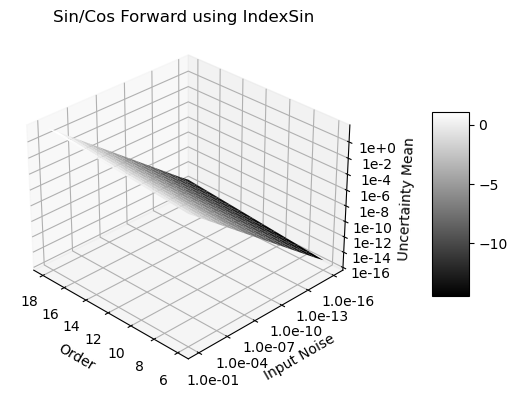

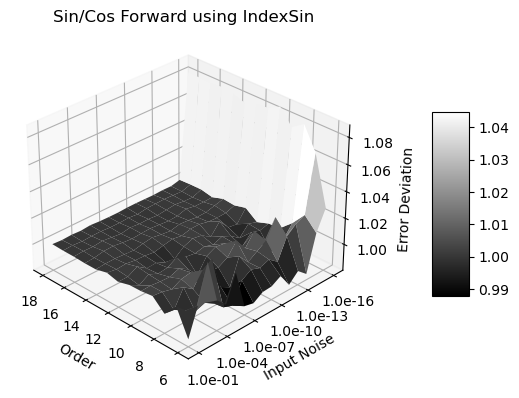

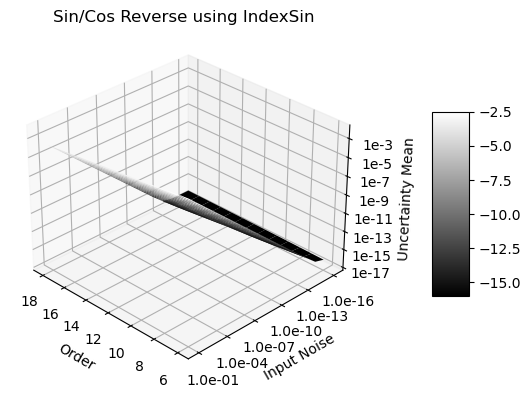

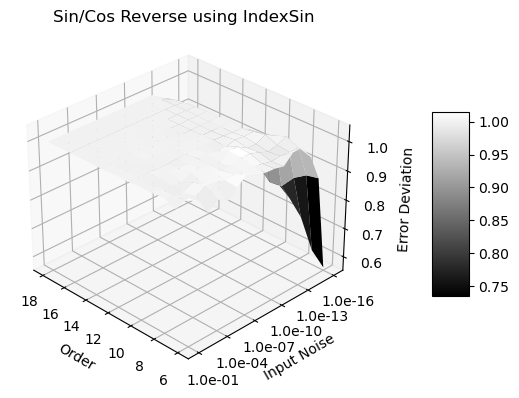

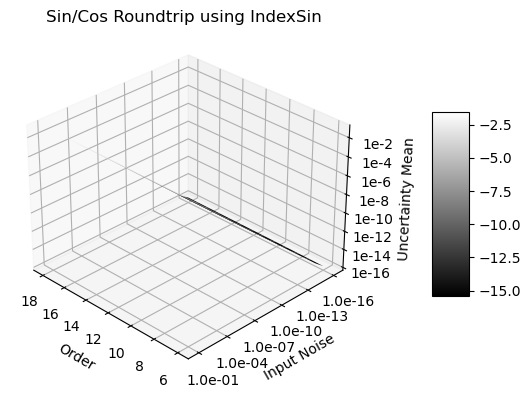

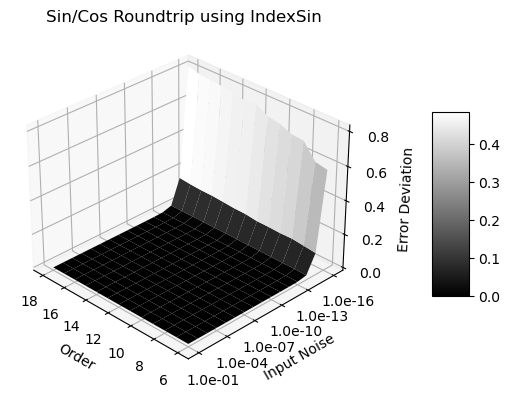

In [187]:
for test in ['Forward', 'Reverse', 'Roundtrip']:
    for value in ['Uncertainty Mean', 'Error Deviation']:
        PlotSurface(test, value, 'Gaussian', 'IndexSin', 'Aggr', logz=(value=='Uncertainty Mean'))

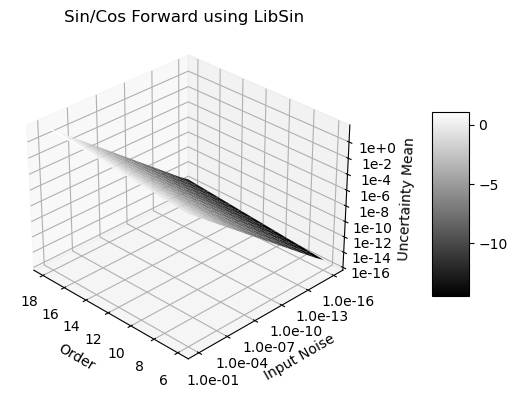

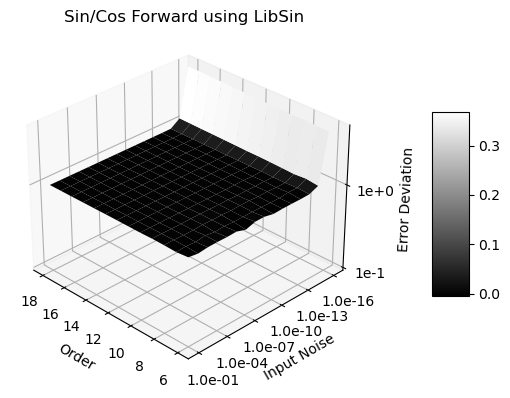

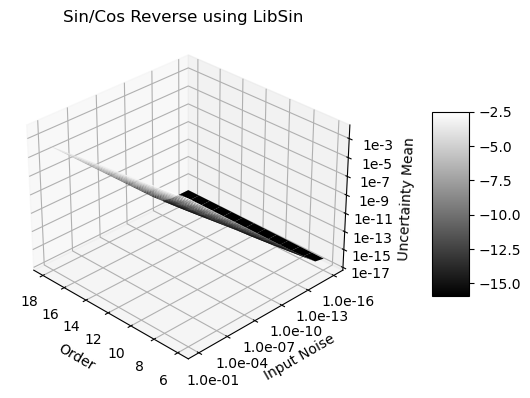

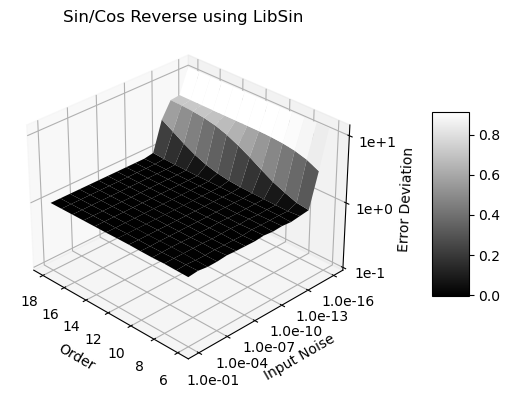

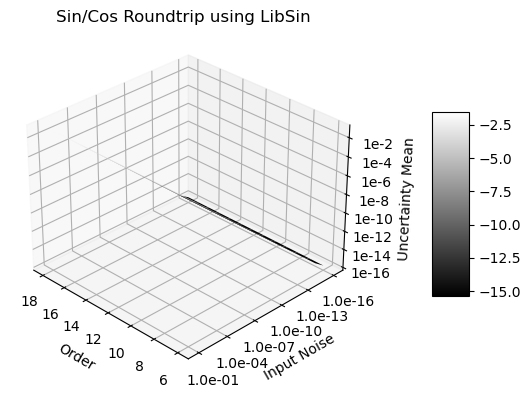

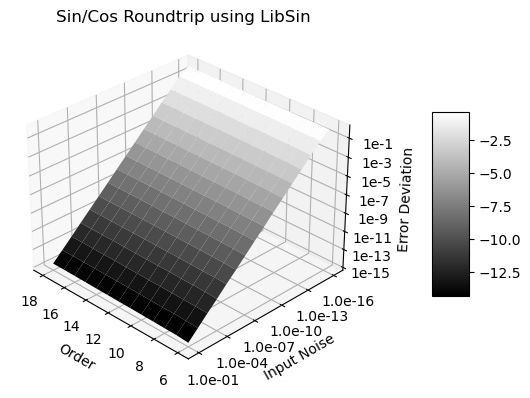

In [188]:
for test in ['Forward', 'Reverse', 'Roundtrip']:
    for value in ['Uncertainty Mean', 'Error Deviation']:
        PlotSurface(test, value, 'Gaussian', 'LibSin', 'Aggr', logz=True)

## Linear

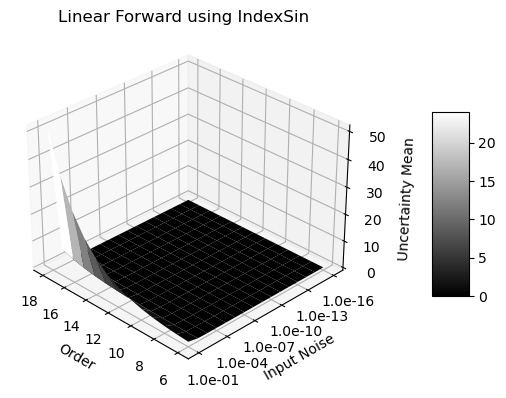

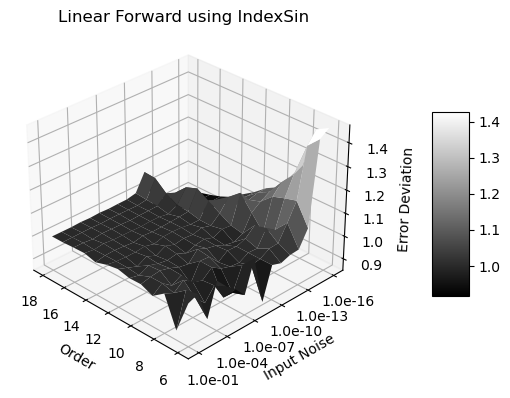

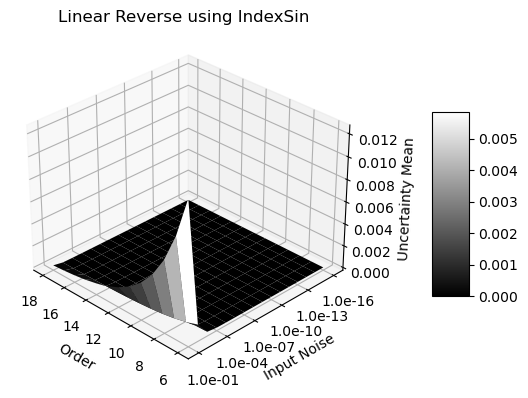

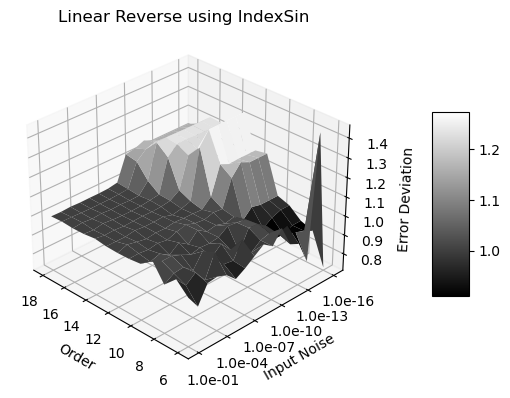

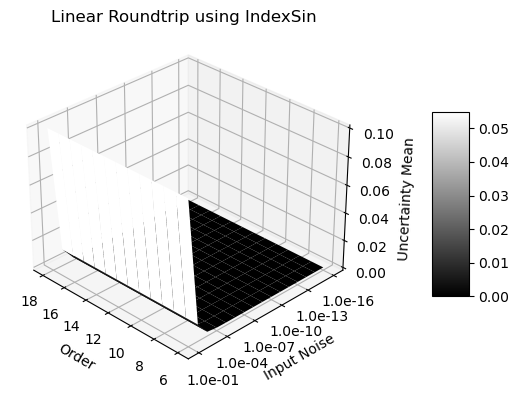

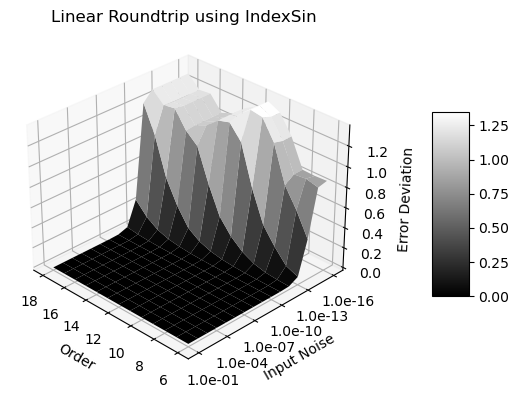

In [189]:
for test in ['Forward', 'Reverse', 'Roundtrip']:
    for value in ['Uncertainty Mean', 'Error Deviation']:
        PlotSurface(test, value, 'Gaussian', 'IndexSin', 'Linear')

## LibSin Linear

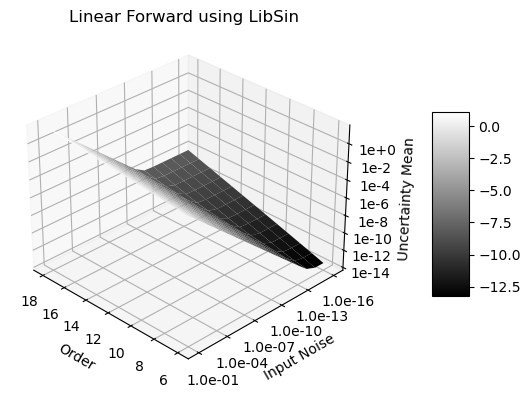

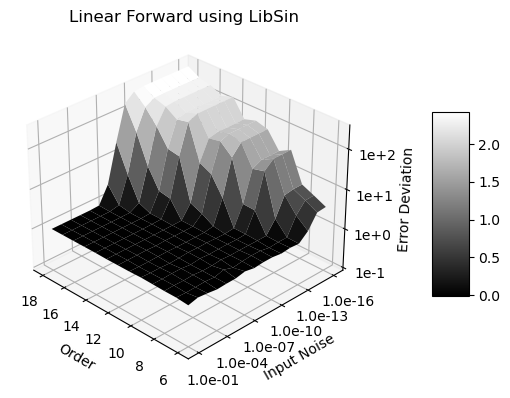

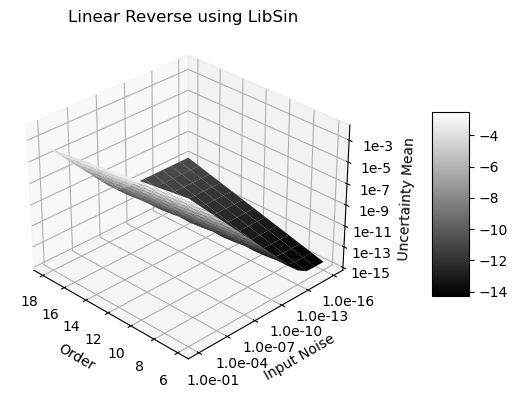

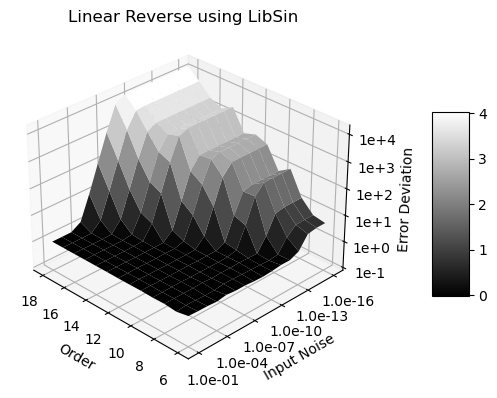

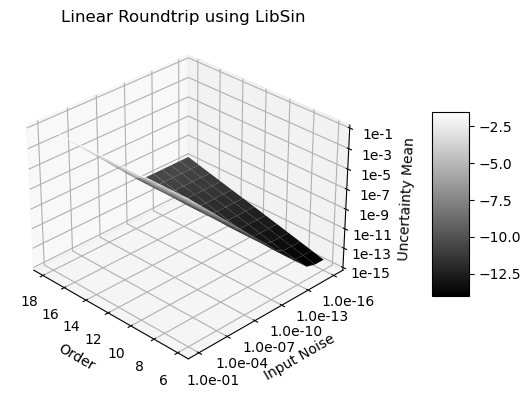

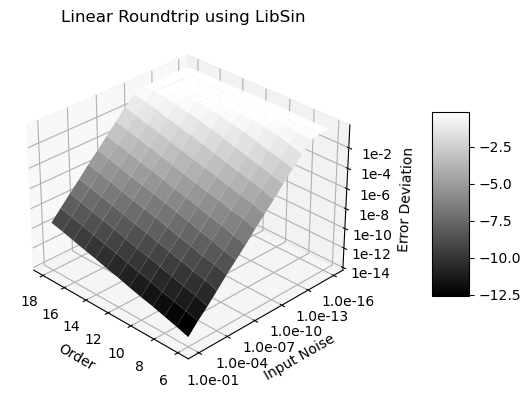

In [190]:
for test in ['Forward', 'Reverse', 'Roundtrip']:
    for value in ['Uncertainty Mean', 'Error Deviation']:
        PlotSurface(test, value, 'Gaussian', 'LibSin', 'Linear', logz=True)

# Histogram

In [191]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

-3.0  -2.8  -2.6     -2.4      -2.2     -2.0      -1.8     -1.6      -1.4  \
0   0.0   0.0   0.0  0.00000  0.032258  0.00000  0.032258  0.00000  0.032258   
1   0.0   0.0   0.0  0.03125  0.000000  0.00000  0.000000  0.06250  0.000000   
2   0.0   0.0   0.0  0.00000  0.000000  0.00000  0.000000  0.00000  0.000000   
3   0.0   0.0   0.0  0.03125  0.000000  0.03125  0.000000  0.00000  0.031250   
4   0.0   0.0   0.0  0.00000  0.000000  0.00000  0.062500  0.03125  0.093750   

      -1.2  ...       1.2       1.4       1.6      1.8       2.0       2.2  \
0  0.00000  ...  0.064516  0.032258  0.064516  0.00000  0.032258  0.032258   
1  0.00000  ...  0.093750  0.031250  0.000000  0.03125  0.000000  0.000000   
2  0.00000  ...  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
3  0.12500  ...  0.031250  0.031250  0.000000  0.06250  0.000000  0.000000   
4  0.03125  ...  0.031250  0.062500  0.031250  0.00000  0.000000  0.000000   

   2.4      2.6  2.8  3.0  
0  0.0  0.00000  0.0  0.0  
1  0.0  0.03125  0.0  0.0  
2  0.0  0.00000  0.0  0.0  
3  0.0  0.00000  0.0  0.0  
4  0.0  0.00000  0.0  0.0  

[5 rows x 31 columns]

## Sin/Cos

### Sin at different freq

In [192]:
def PlotErrorDev(sinSource, noiseType='Gaussian', noise=0, signal='Sin', test='Forward'):
    dfPlot = df[(df['SinSource']==sinSource) & (df['NoiseType']==noiseType) & (df['Noise']==noise) & 
                (df['Signal']==signal) & (df['Test']=='Forward')]
    fig, ax = plt.subplots()
    ax.set_title(f'{signal} {test}')
    ax.set_xlabel('Freq')
    ax.set_ylabel('Error Uncertainty')
    plt.grid(True)
    for order in range(6, ORDER + 1):
        ax.plot(dfPlot[dfPlot['Order']==order]['Freq'], dfPlot[dfPlot['Order']==order]['Error Deviation'], label=f'{order}')
    ax.legend(bbox_to_anchor=(1.0, 1.0))

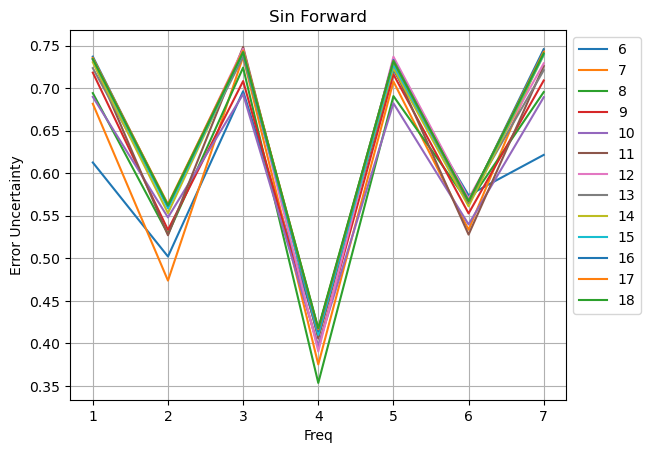

In [193]:
PlotErrorDev('IndexSin')

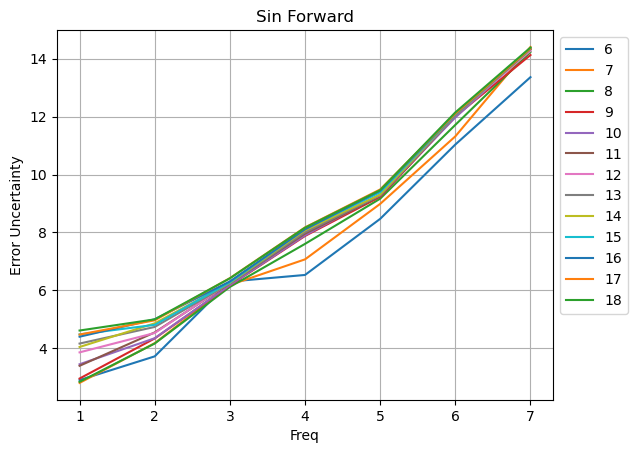

In [194]:
PlotErrorDev('LibSin')

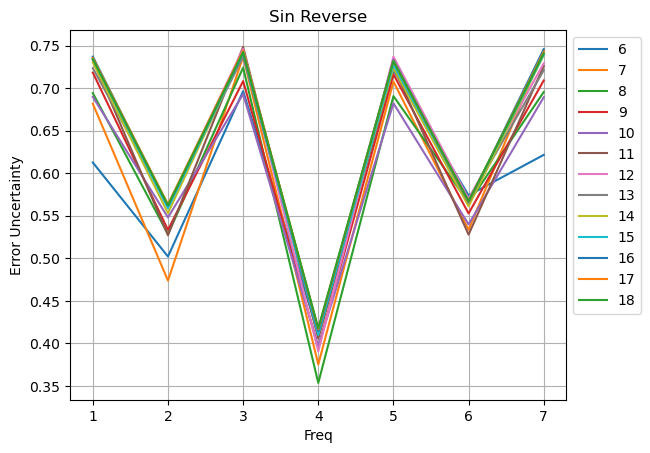

In [195]:
PlotErrorDev('IndexSin', test='Reverse')

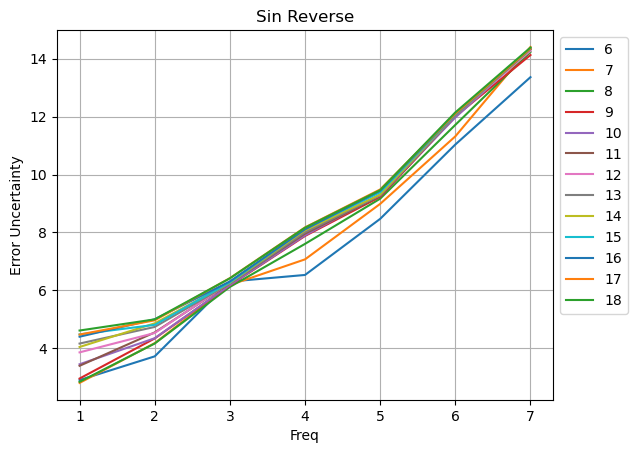

In [196]:
PlotErrorDev('LibSin', test='Reverse')

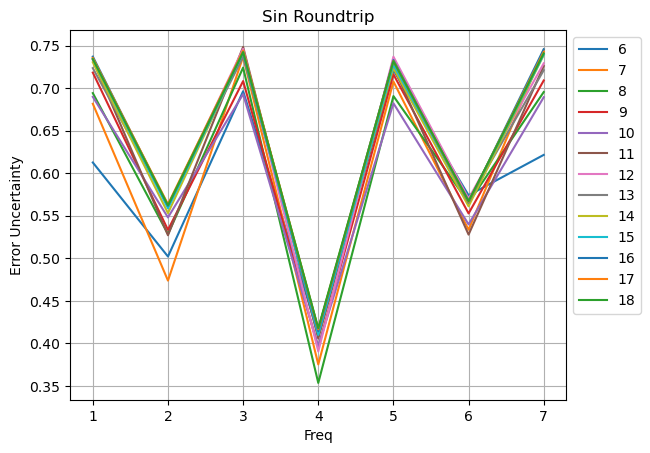

In [197]:
PlotErrorDev('IndexSin', test='Roundtrip')

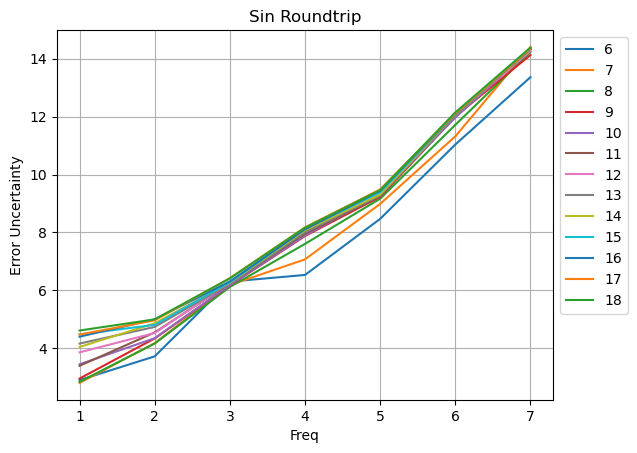

In [198]:
PlotErrorDev('LibSin', test='Roundtrip')

In [199]:
def PlotManyFreq(order, noise, sinSource, signal, test, sFreq=[1,2,3,4,5,6]):
    df['algo'] = df['NoiseType'] + ": "+ df['Freq'].astype(str)

    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['Signal']==signal) & (df['Test']==test) & 
                 (df['SinSource']==sinSource) & (df['Freq'].isin(sFreq))].set_index('algo')
    dfHisto[sHisto].T.plot( style=['-']*3 + ['--']*3 + ['x']*3 + ['+']*3, 
                            title=f'{signal} {test} order={order} freq={sFreq} noise={noise}' )

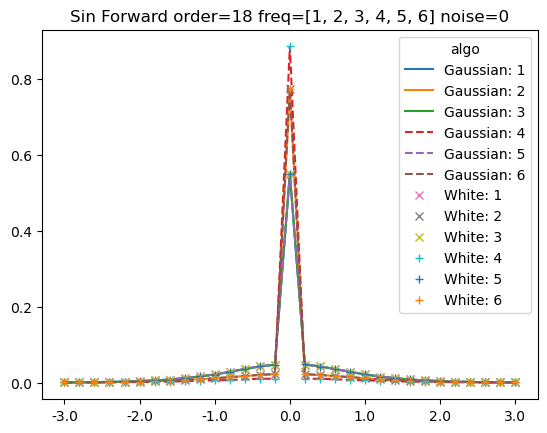

In [200]:
PlotManyFreq(ORDER, 0, 'IndexSin', 'Sin', 'Forward')

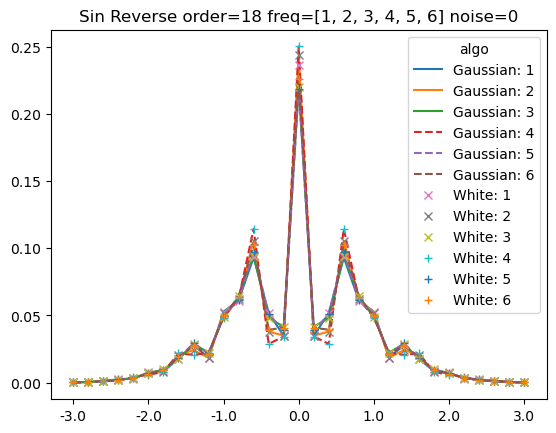

In [201]:
PlotManyFreq(ORDER, 0, 'IndexSin', 'Sin', 'Reverse')

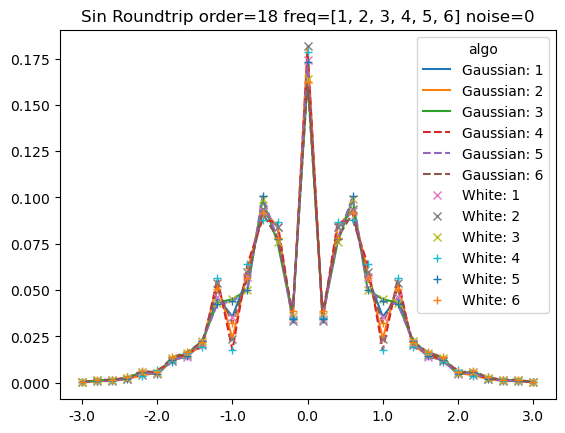

In [202]:
PlotManyFreq(ORDER, 0, 'IndexSin', 'Sin', 'Roundtrip')

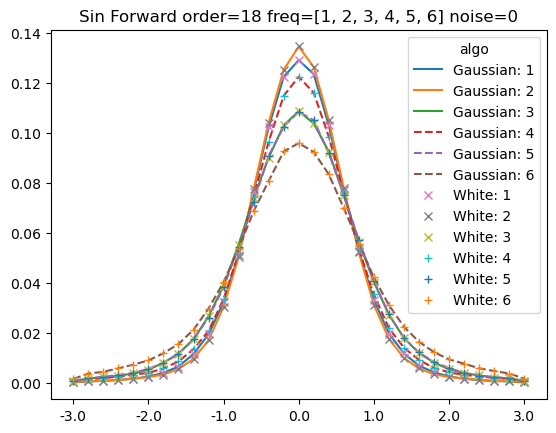

In [203]:
PlotManyFreq(ORDER, 0, 'LibSin', 'Sin', 'Forward')

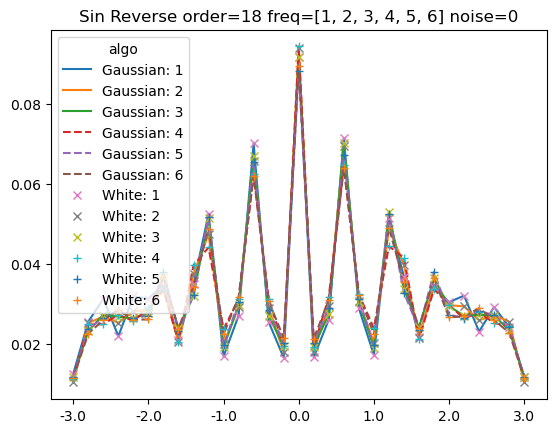

In [204]:
PlotManyFreq(ORDER, 0, 'LibSin', 'Sin', 'Reverse')

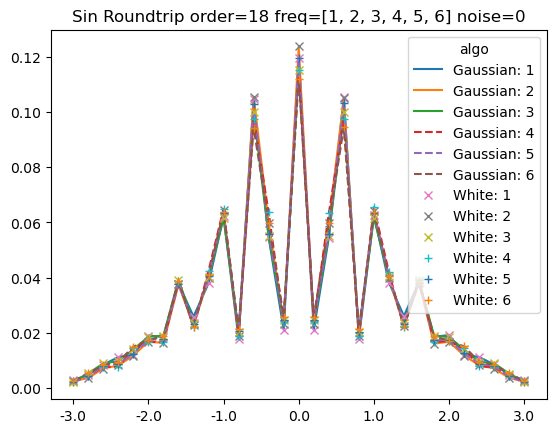

In [205]:
PlotManyFreq(ORDER, 0, 'LibSin', 'Sin', 'Roundtrip')

### Sin vs Cos

In [206]:
def PlotSinCos(order, noise, freq, sinSource, test):
    df['algo'] = df['NoiseType'] + ": "+ df['Signal']

    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['Freq']== freq) & (df['Test']==test) & 
                 (df['SinSource']==sinSource) & (df['Signal'].isin(['Sin', 'Cos']))].set_index('algo')
    dfHisto[sHisto].T.plot(style=['-', 'x', '--', '+', '--', '--', '-.', '-.', '-.'], logy=True, 
                       title=f'Sin/Cos {test} order={order} freq={freq} noise={noise}')

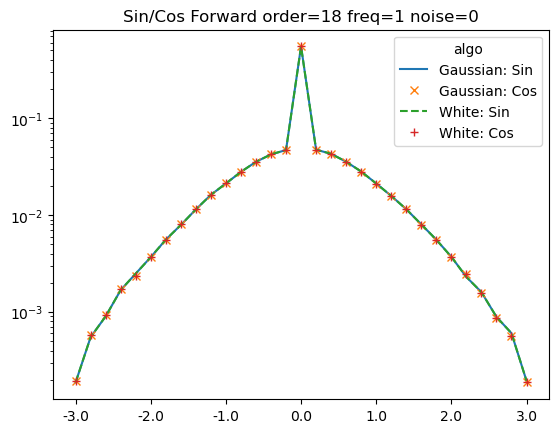

In [207]:
PlotSinCos(ORDER, 0, 1, 'IndexSin', 'Forward')

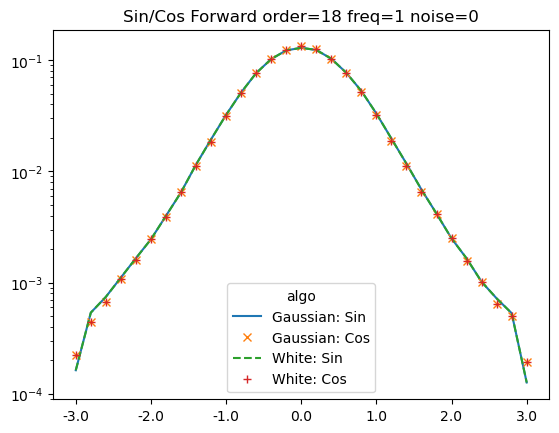

In [208]:
PlotSinCos(ORDER, 0, 1, 'LibSin', 'Forward')

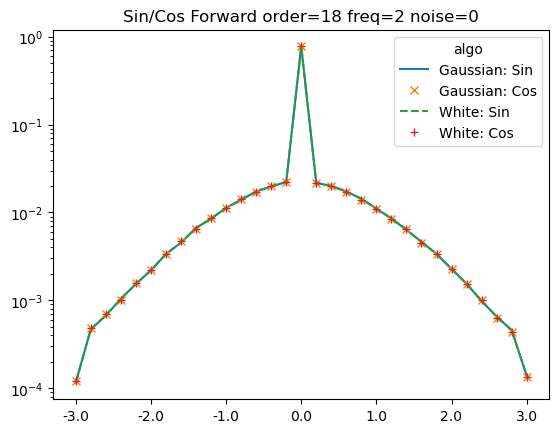

In [209]:
PlotSinCos(ORDER, 0, 2, 'IndexSin', 'Forward')

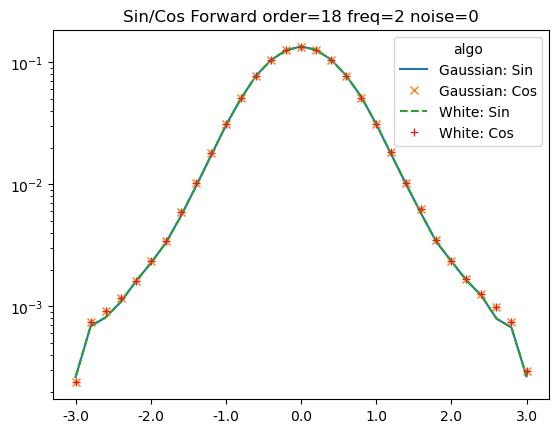

In [210]:
PlotSinCos(ORDER, 0, 2, 'LibSin', 'Forward')

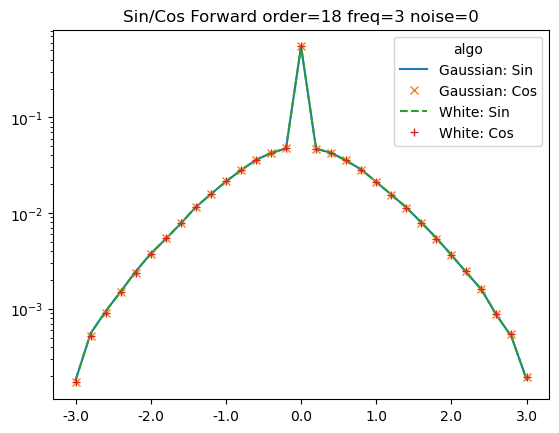

In [211]:
PlotSinCos(ORDER, 0, 3, 'IndexSin', 'Forward')

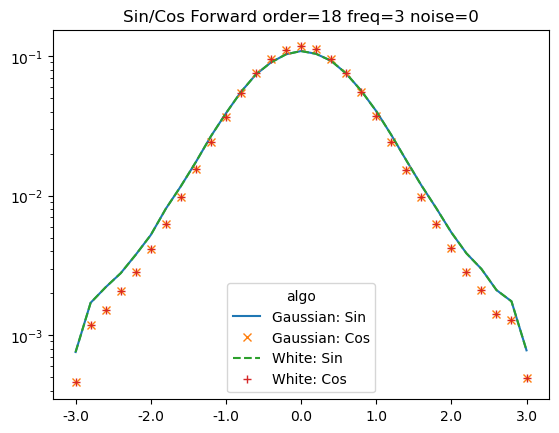

In [212]:
PlotSinCos(ORDER, 0, 3, 'LibSin', 'Forward')

### Aggr vs Noise

In [277]:
def PlotHistogramClean( order, sinSource, signal, freq=0, ylim=[] ):
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    df['legend'] = df['Test']

    dfHisto = df[(df['Order']==order) & (df['NoiseType']=='Gaussian') & (df['Noise']==0) & 
                 (df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Freq']==freq)]\
                .set_index('legend')
    ax = dfHisto[sHisto].T.plot(style=['k-', 'k--', 'k:', 'k-.', 'kx', 'k+'],
                           title=f'{signalName} order={order} using {sinSource}')
    ax.set_xlabel('Normalized Error')
    ax.set_ylabel('Normalized Histogram Count')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)

In [278]:
def PlotHistogram( order, noise, sinSource, signal, freq=0, ylim=[] ):
    if noise == 0:
        return PlotHistogramClean( order, sinSource, signal, freq, ylim )
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    df['legend'] = df['Test'] + " " + df['NoiseType']

    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['SinSource']==sinSource) & 
                 (df['Signal']==signal) & (df['Freq']==freq)].set_index('legend')
    ax = dfHisto[sHisto].T.plot(style=['k-', 'k--', 'k:', 'k-.', 'kx', 'k+'],
                           title=f'{signalName} order={order} noise={noise:.0e} using {sinSource}')
    ax.set_xlabel('Normalized Error')
    ax.set_ylabel('Normalized Histogram Count')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)

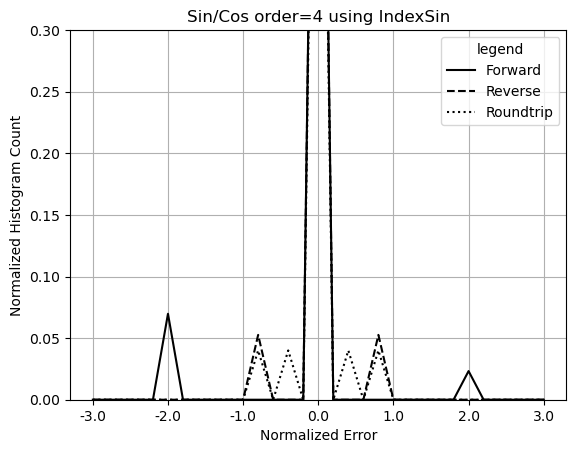

In [279]:
PlotHistogram(4, 0, 'IndexSin', 'Aggr', ylim=[0, 0.3])

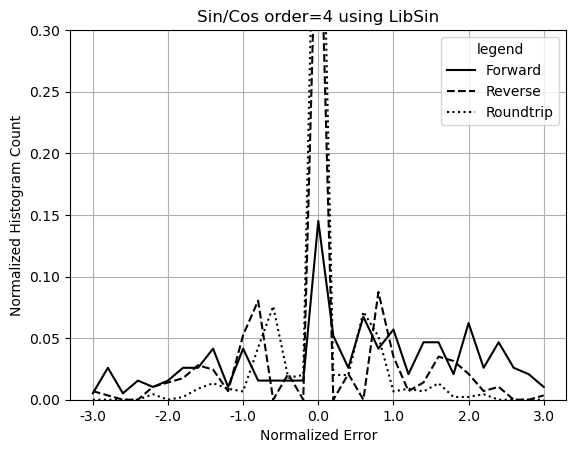

In [280]:
PlotHistogram(4, 0, 'LibSin', 'Aggr', ylim=[0, 0.3])

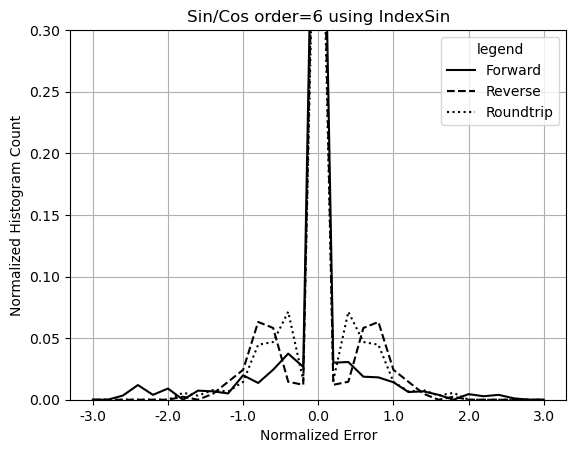

In [281]:
PlotHistogram(6, 0, 'IndexSin', 'Aggr', ylim=[0, 0.3])

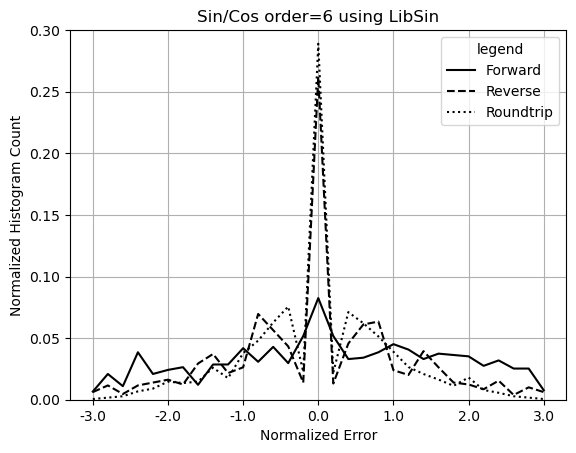

In [282]:
PlotHistogram(6, 0, 'LibSin', 'Aggr', ylim=[0, 0.3])

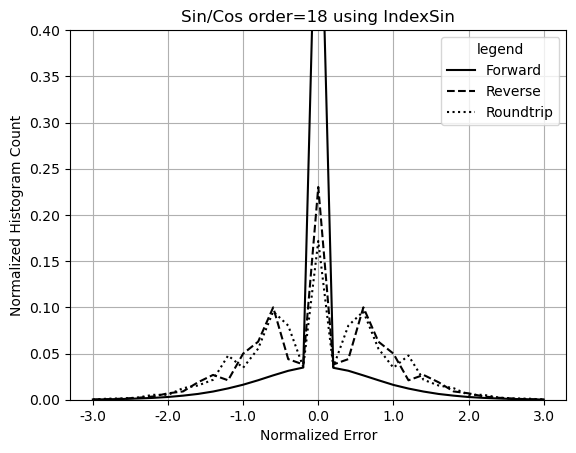

In [283]:
PlotHistogram(ORDER, 0, 'IndexSin', 'Aggr', ylim=[0, 0.4])

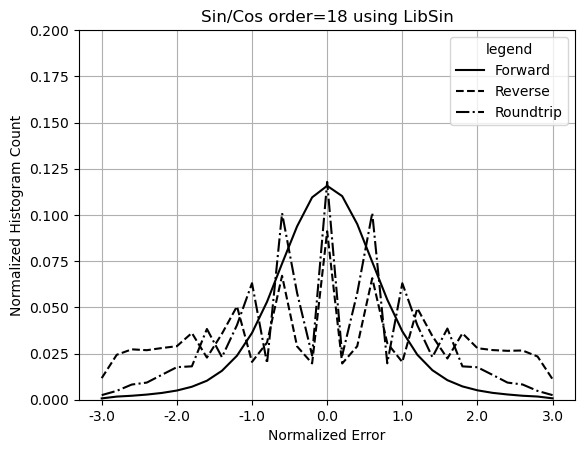

In [220]:
PlotHistogram(ORDER, 0, 'LibSin', 'Aggr', ylim=[0, 0.2])

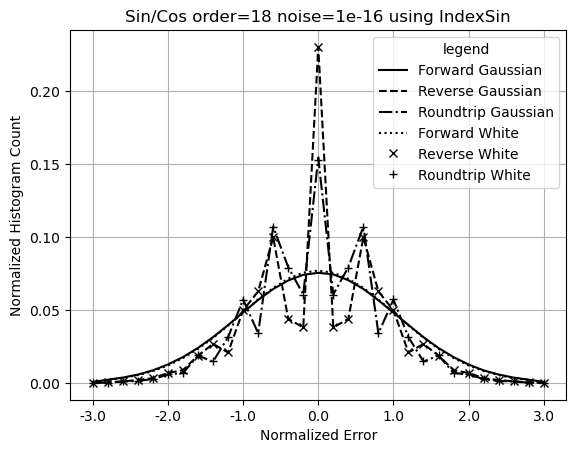

In [221]:
PlotHistogram(ORDER, 1e-16, 'IndexSin', 'Aggr')

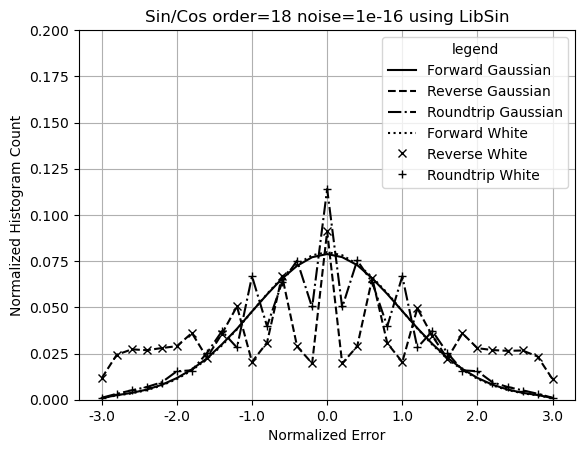

In [222]:
PlotHistogram(ORDER, 1e-16, 'LibSin', 'Aggr', ylim=[0, 0.2])

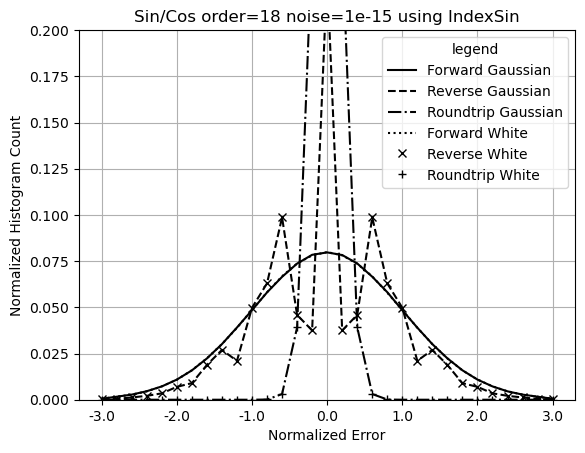

In [223]:
PlotHistogram(ORDER, 1e-15, 'IndexSin', 'Aggr', ylim=[0, 0.2])

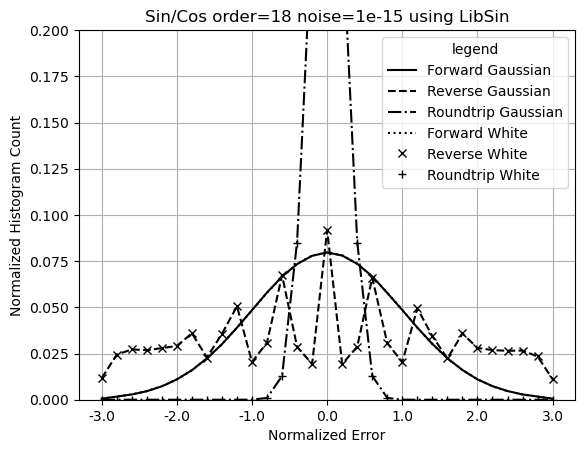

In [224]:
PlotHistogram(ORDER, 1e-15, 'LibSin', 'Aggr', ylim=[0, 0.2])

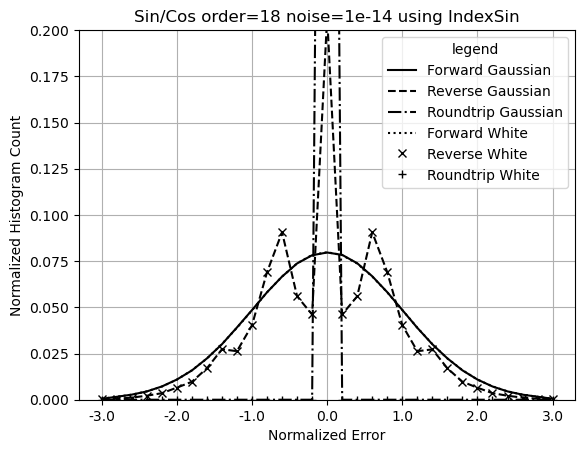

In [225]:
PlotHistogram(ORDER, 1e-14, 'IndexSin', 'Aggr', ylim=[0, 0.2])

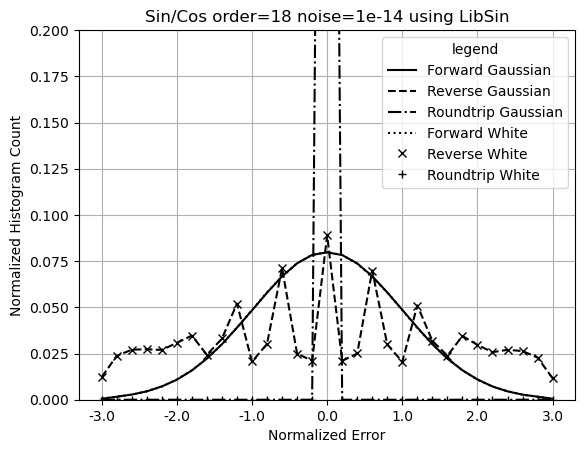

In [226]:
PlotHistogram(ORDER, 1e-14, 'LibSin', 'Aggr', ylim=[0, 0.2])

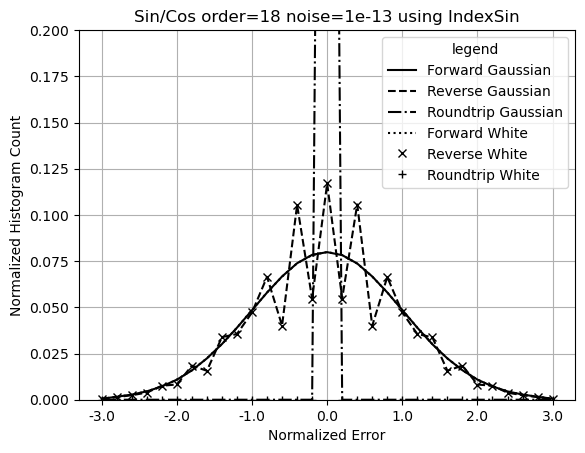

In [227]:
PlotHistogram(ORDER, 1e-13, 'IndexSin', 'Aggr', ylim=[0, 0.2])

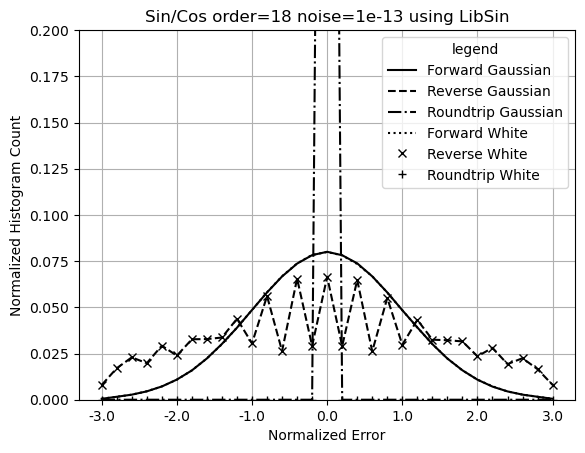

In [228]:
PlotHistogram(ORDER, 1e-13, 'LibSin', 'Aggr', ylim=[0, 0.2])

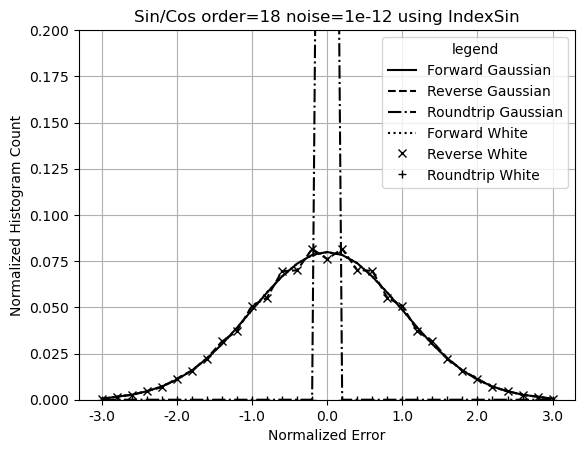

In [229]:
PlotHistogram(ORDER, 1e-12, 'IndexSin', 'Aggr', ylim=[0, 0.2])

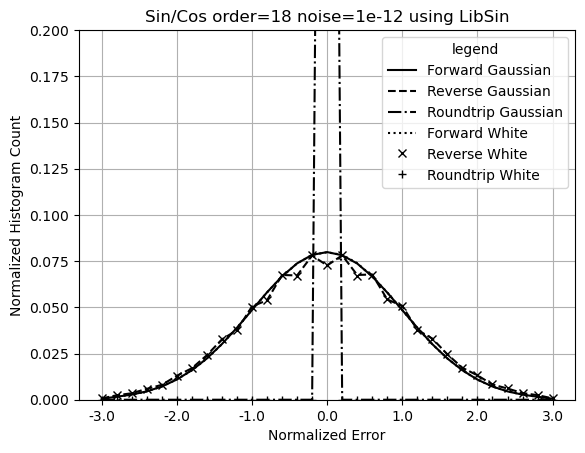

In [230]:
PlotHistogram(ORDER, 1e-12, 'LibSin', 'Aggr', ylim=[0, 0.2])

### Linear vs Noise

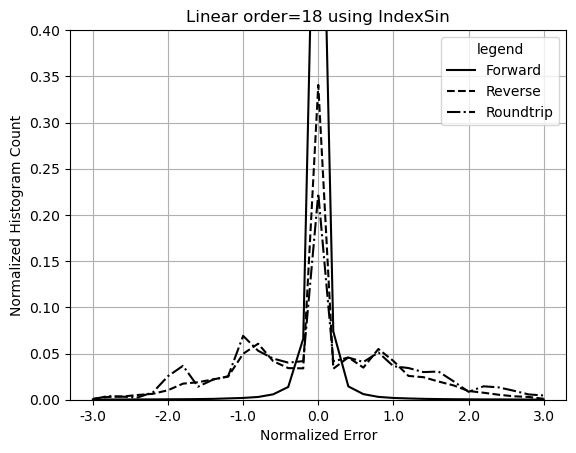

In [231]:
PlotHistogram(ORDER, 0, 'IndexSin', 'Linear', ylim=[0, 0.4])

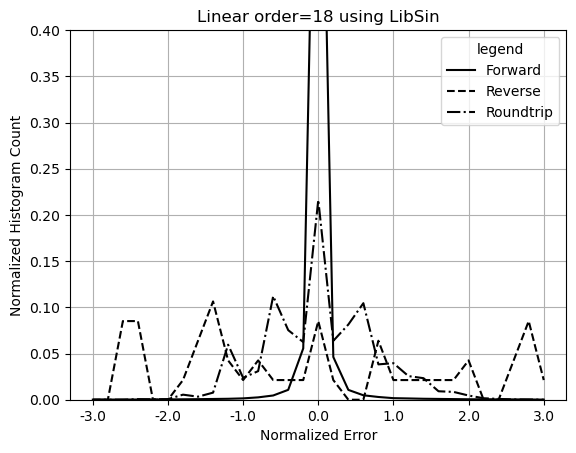

In [232]:
PlotHistogram(ORDER, 0, 'LibSin', 'Linear', ylim=[0, 0.4])

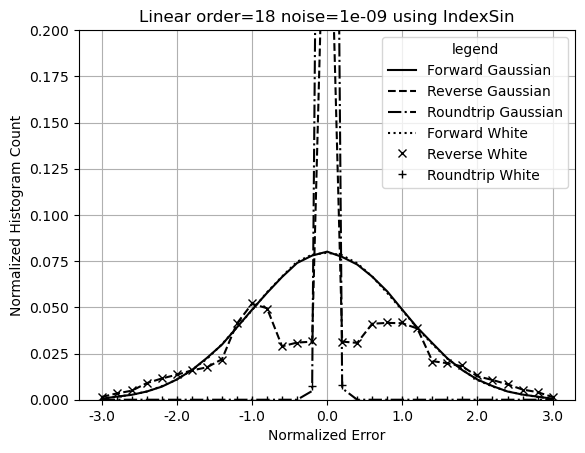

In [233]:
PlotHistogram(ORDER, 1e-9, 'IndexSin', 'Linear', ylim=[0, 0.2])

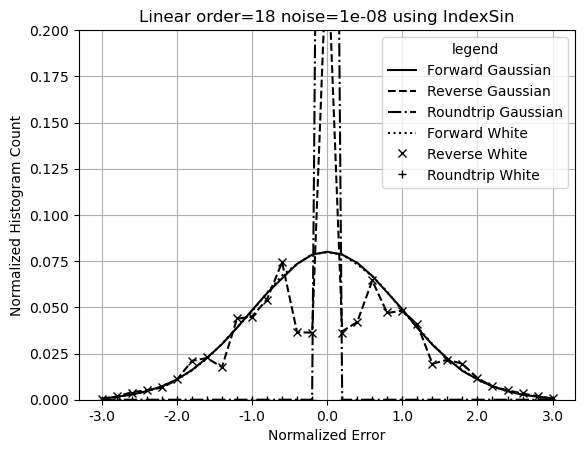

In [234]:
PlotHistogram(ORDER, 1e-8, 'IndexSin', 'Linear', ylim=[0, 0.2])

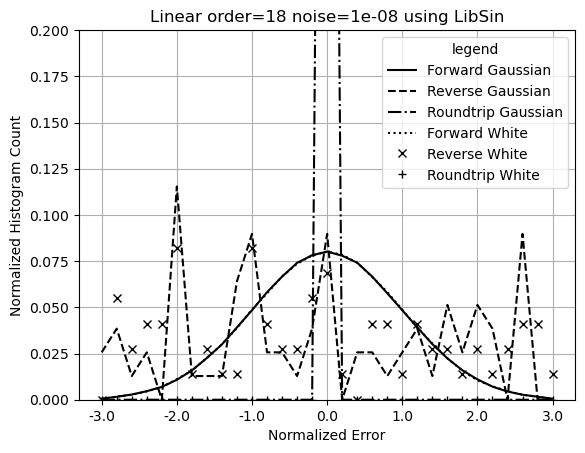

In [235]:
PlotHistogram(ORDER, 1e-8, 'LibSin', 'Linear', ylim=[0, 0.2])

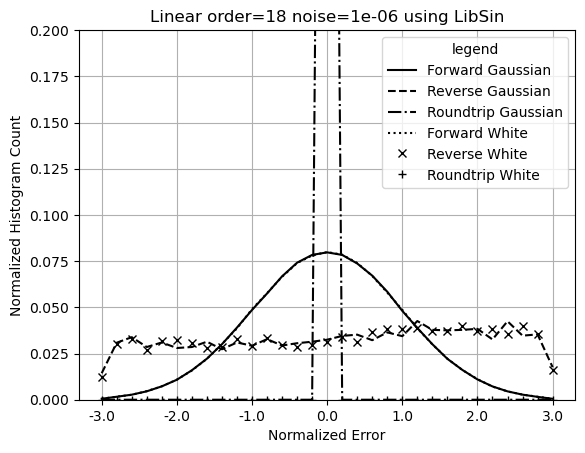

In [236]:
PlotHistogram(ORDER, 1e-6, 'LibSin', 'Linear', ylim=[0, 0.2])

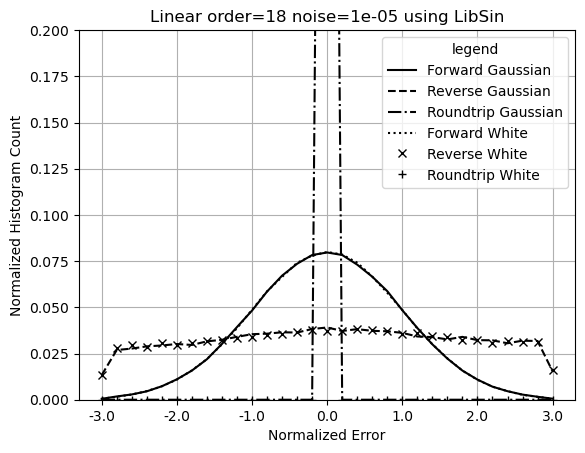

In [237]:
PlotHistogram(ORDER, 1e-5, 'LibSin', 'Linear', ylim=[0, 0.2])

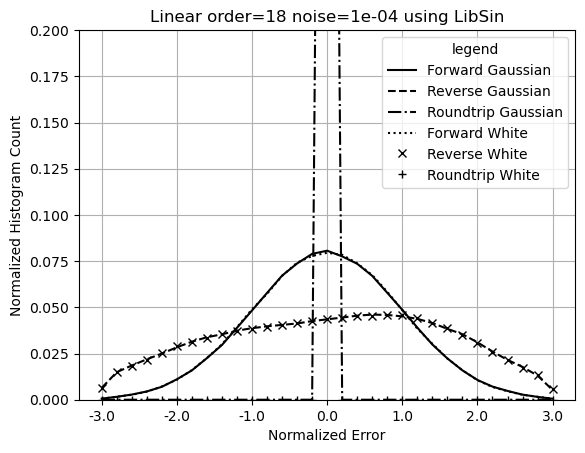

In [238]:
PlotHistogram(ORDER, 1e-4, 'LibSin', 'Linear', ylim=[0, 0.2])

# vs Order

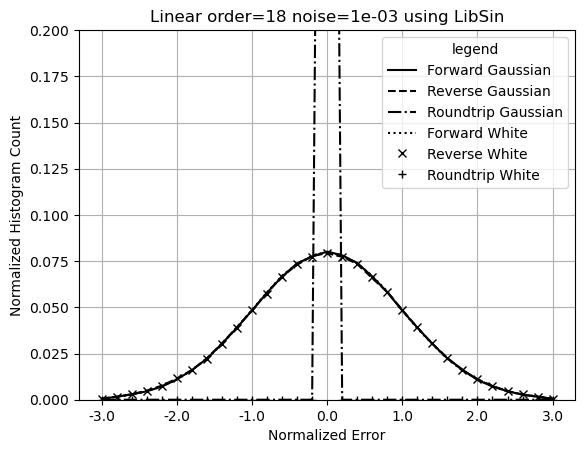

In [239]:
PlotHistogram(ORDER, 1e-3, 'LibSin', 'Linear', ylim=[0, 0.2])

In [240]:
def PlotVsOrder( sinSource, signal, freq=0, sTest=('Forward', 'Reverse', 'Roundtrip'), 
                 sValue=('Error Deviation', 'Uncertainty Mean'), 
                 sStyle=('-', '--', ':'), sLogy=(False, True), 
                 noiseType='Gaussian', noise=0 ):
    
    fig, ax = plt.subplots()
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    ax.set_title(f'{signalName} without noise using {sinSource}' if noise==0 else f'{signalName} with {noise:.0e} noise using {sinSource}')
    ax.set_xlabel('Order')
    ax.set_ylabel(sValue[0])
    if sLogy[0]:
        ax.set_yscale('log')
    plt.grid(True)
    
    ax2 = ax.twinx()
    ax2.set_ylabel(sValue[1])
    if sLogy[1]:
        ax2.set_yscale('log')
    
    for test, style in zip(sTest, sStyle):
        dfPlot = df[(df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test) &
                    (df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['Order'], dfPlot[sValue[0]], c='k', ls=style, label=f'{test} {sValue[0]}')
        ax2.plot(dfPlot['Order'], dfPlot[sValue[1]], c='gray', ls=style, label=f'{test} {sValue[1]}')

    ax.legend(bbox_to_anchor=(1.67, 1.0))
    ax2.legend(bbox_to_anchor=(1.67, 0.3))

In [241]:
def PrintVsOrder( sinSource, signal, freq, test, value ,noiseType='Gaussian', noise=0 ):
    return df[(df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test) &
               (df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('Order')\
            [['Order', 'Uncertainty Mean', 'Uncertainty Deviation', 'Error Deviation']]


## Sin/Cos

In [242]:
PrintVsOrder('LibSin', 'Aggr', 0, 'Forward', 'Error Deviation').head(100)

Order  Uncertainty Mean  Uncertainty Deviation  Error Deviation
31245      4      2.970902e-16           1.636448e-16     7.571901e+14
31293      5      4.281113e-16           2.307847e-16     8.353095e+00
31341      6      6.080600e-16           3.567395e-16     8.280821e+00
31389      7      8.644167e-16           5.472819e-16     8.734776e+00
31437      8      1.228239e-15           8.349696e-16     8.935433e+00
31485      9      1.747952e-15           1.265675e-15     8.973759e+00
31533     10      2.485166e-15           1.908639e-15     9.054666e+00
31581     11      3.531628e-15           2.863420e-15     9.087183e+00
31629     12      5.013412e-15           4.276731e-15     9.118995e+00
31677     13      7.111320e-15           6.361364e-15     9.158794e+00
31725     14      1.007940e-14           9.427266e-15     9.182980e+00
31773     15      1.427817e-14           1.392401e-14     9.226881e+00
31821     16      2.021681e-14           2.050376e-14     9.244399e+00
44877     17      2.861599e-14           3.011092e-14     9.273117e+00
48141     18      4.049460e-14           4.411214e-14     9.294489e+00

In [243]:
PrintVsOrder('LibSin', 'Aggr', 0, 'Reverse', 'Error Deviation').head(100)

Order  Uncertainty Mean  Uncertainty Deviation  Error Deviation
31246      4      7.710237e-17           5.932786e-17     4.583931e+16
31294      5      8.862076e-17           4.889247e-17     4.060404e+16
31342      6      9.565839e-17           4.259886e-17     2.127155e+16
31390      7      1.013632e-16           3.784138e-17     1.257576e+16
31438      8      1.060512e-16           3.449170e-17     7.818172e+15
31486      9      1.101942e-16           3.210930e-17     4.997903e+15
31534     10      1.139389e-16           3.042287e-17     3.252241e+15
31582     11      1.174400e-16           2.917445e-17     2.142516e+15
31630     12      1.207561e-16           2.821413e-17     1.424283e+15
31678     13      1.239380e-16           2.743373e-17     9.534244e+14
31726     14      1.270096e-16           2.677248e-17     6.417557e+14
31774     15      1.299895e-16           2.619117e-17     4.339117e+14
31822     16      1.328888e-16           2.566700e-17     2.944767e+14
44878     17      1.357163e-16           2.518567e-17     2.004783e+14
48142     18      1.384783e-16           2.473833e-17     1.368528e+14

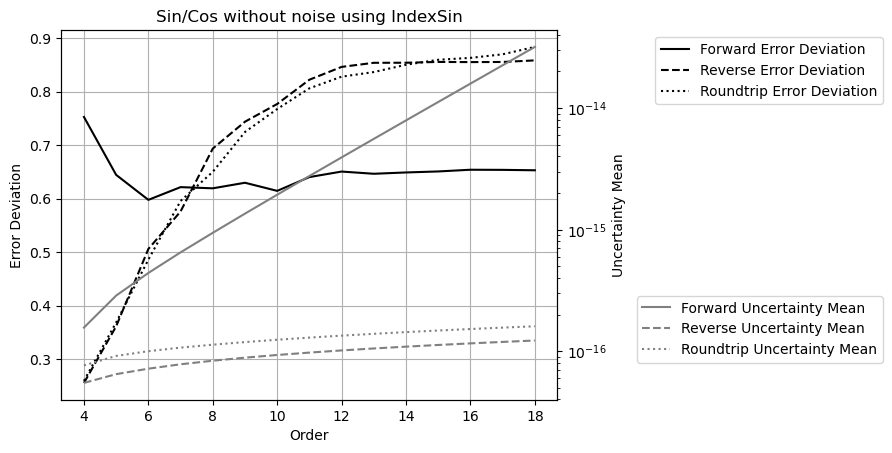

In [244]:
PlotVsOrder('IndexSin', 'Aggr')

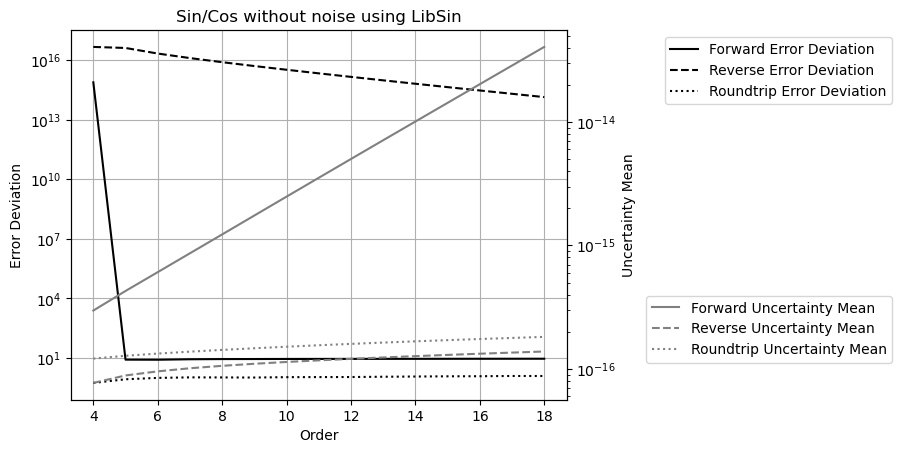

In [245]:
PlotVsOrder('LibSin', 'Aggr', sLogy=(True, True))

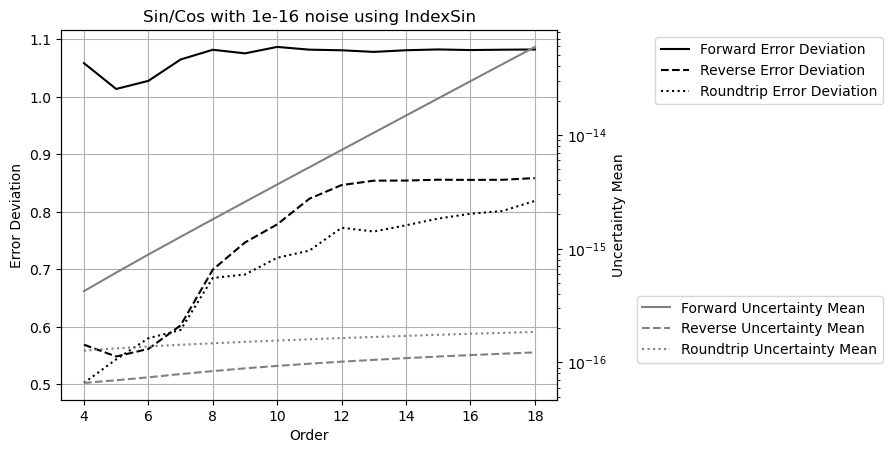

In [246]:
PlotVsOrder('IndexSin', 'Aggr', noise=1e-16)

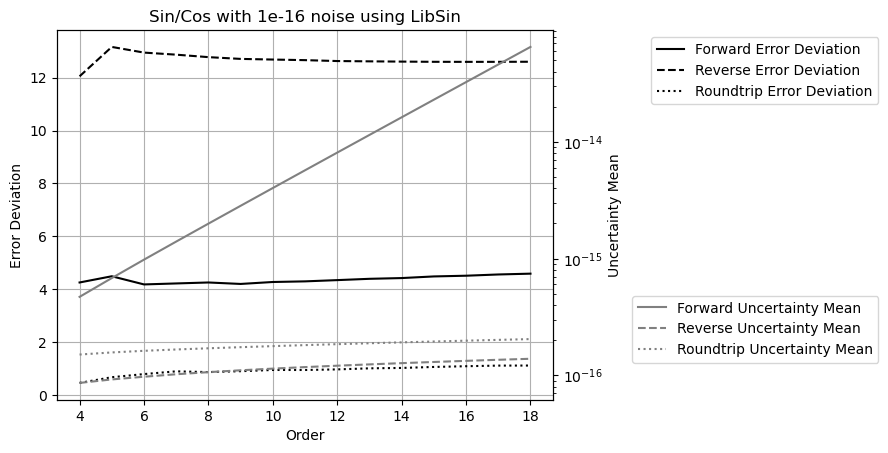

In [247]:
PlotVsOrder('LibSin', 'Aggr', noise=1e-16)

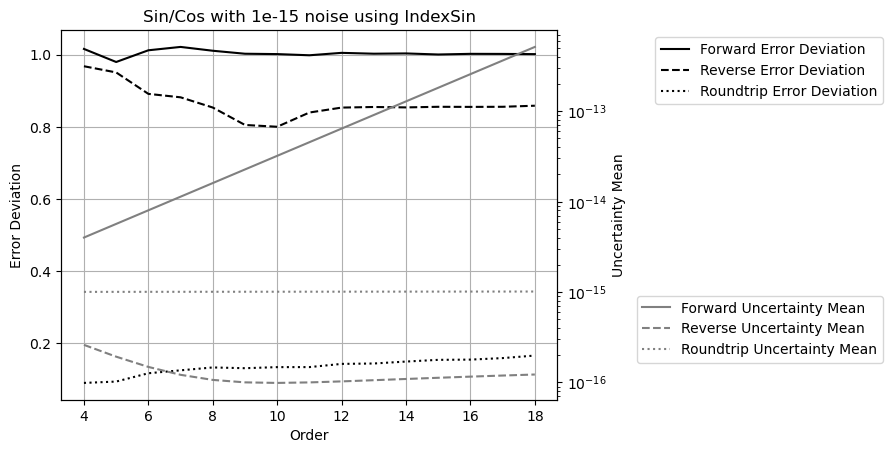

In [248]:
PlotVsOrder('IndexSin', 'Aggr', noise=1e-15)

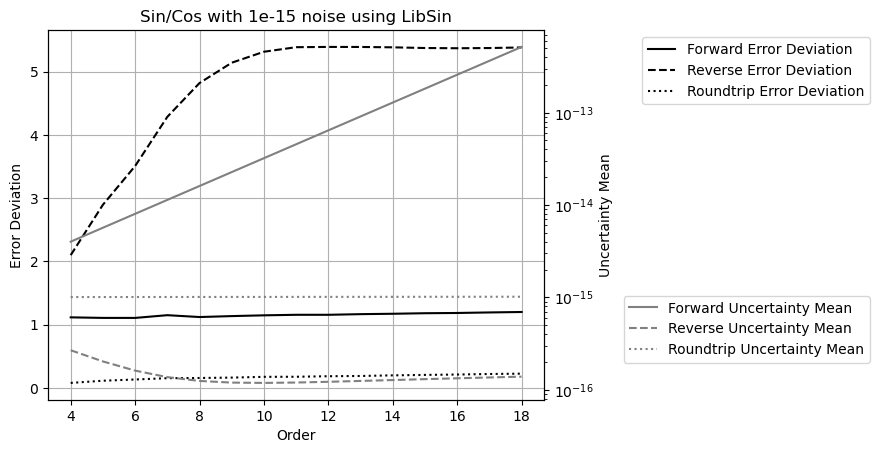

In [249]:
PlotVsOrder('LibSin', 'Aggr', noise=1e-15)

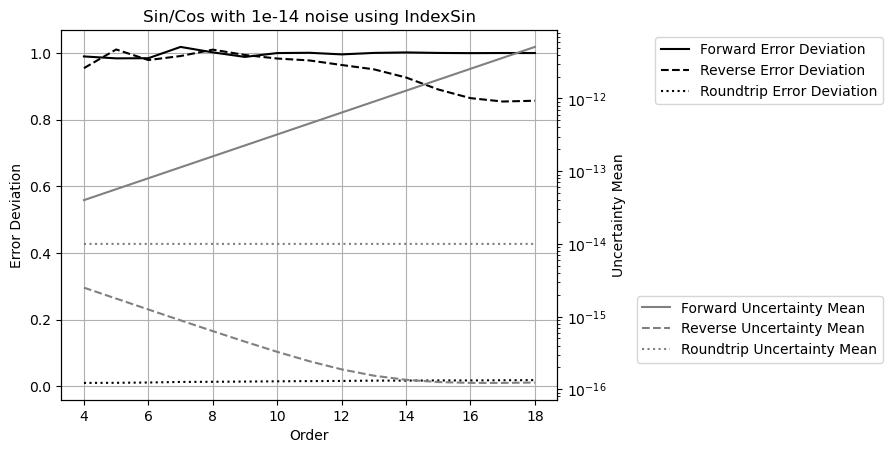

In [250]:
PlotVsOrder('IndexSin', 'Aggr', noise=1e-14)

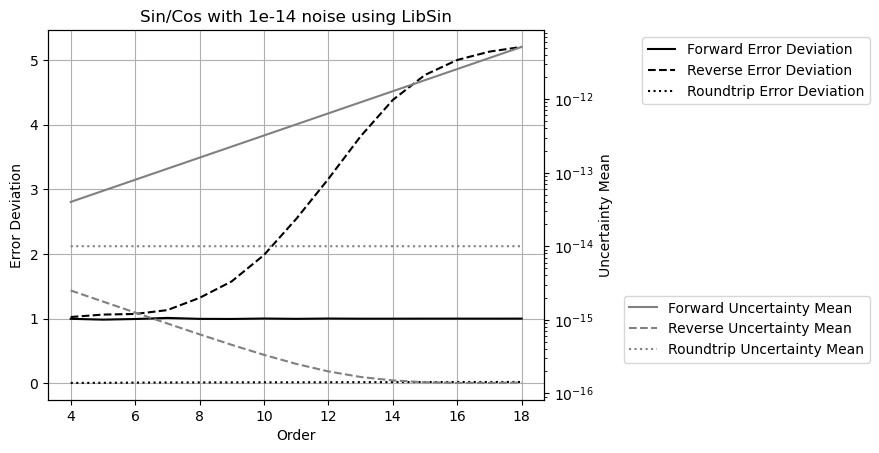

In [251]:
PlotVsOrder('LibSin', 'Aggr', noise=1e-14)

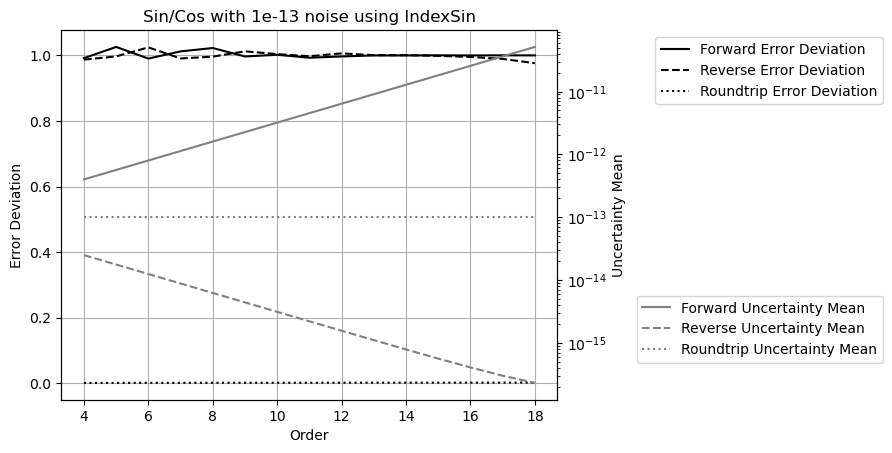

In [252]:
PlotVsOrder('IndexSin', 'Aggr', noise=1e-13)

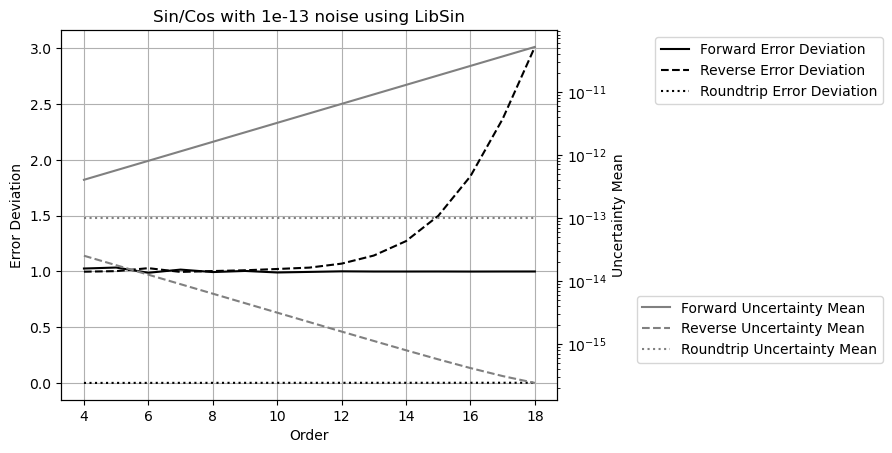

In [253]:
PlotVsOrder('LibSin', 'Aggr', noise=1e-13)

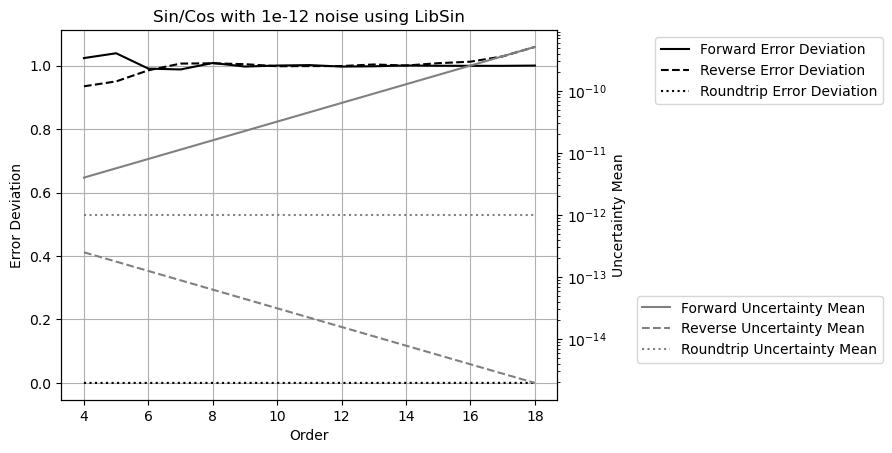

In [254]:
PlotVsOrder('LibSin', 'Aggr', noise=1e-12)

In [255]:
def FitVsOrder( sinSource, value='Uncertainty Mean', signal='Aggr', freq=0, 
                sTest=('Forward', 'Reverse', 'Roundtrip'), 
                sStyle=('x', '--'), sColor = ('r','g','b','y','c','r'), 
                logy=True, noiseType='Gaussian', noise=0 ):
    
    fig, ax = plt.subplots()
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    ax.set_title(f'{signalName} without noise' if noise==0 else f'{signalName} with {noise:.0e} noise using {sinSource}')
    ax.set_xlabel('Noise')
    ax.set_ylabel(value)
    if logy:
        ax.set_yscale('log')
    plt.grid(True)
    
    for test, color in zip(sTest, sColor):
        dfPlot = df[(df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test) &
                    (df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['Order'], dfPlot[value], ''.join([color, sStyle[0]]), label=f'{test} {value}')
        
        sCoef = np.polyfit( dfPlot['Order'], np.log(dfPlot[value]), 1 )
        sFit = np.exp(dfPlot['Order'] * sCoef[0] + sCoef[1])
        ax.plot(dfPlot['Order'], sFit, ''.join([color, sStyle[1]]), label=f'{test} {math.exp(sCoef[0]):.3f}')
        
    ax.legend(bbox_to_anchor=(1.67, 1.0))


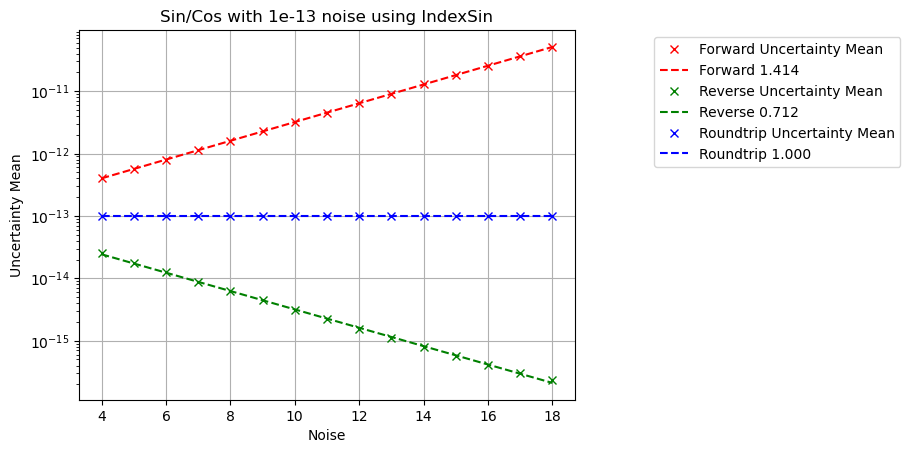

In [256]:
FitVsOrder('IndexSin', noise=1e-13)

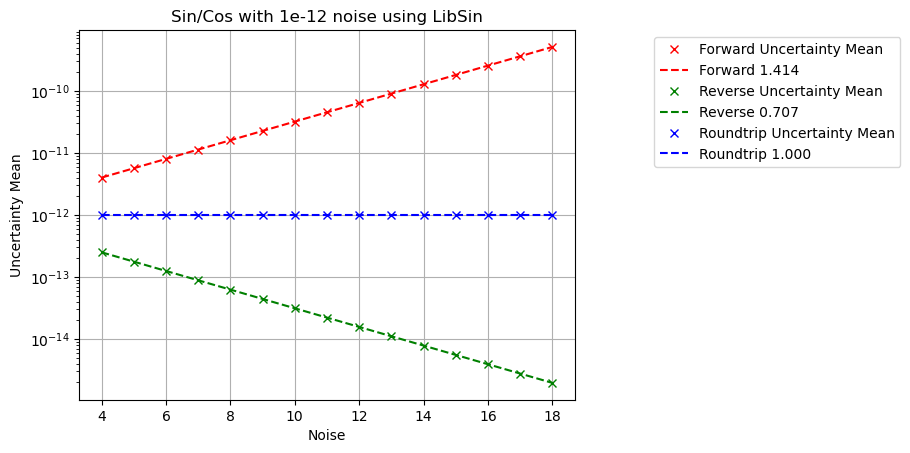

In [257]:
FitVsOrder('LibSin', noise=1e-12)

## Linear

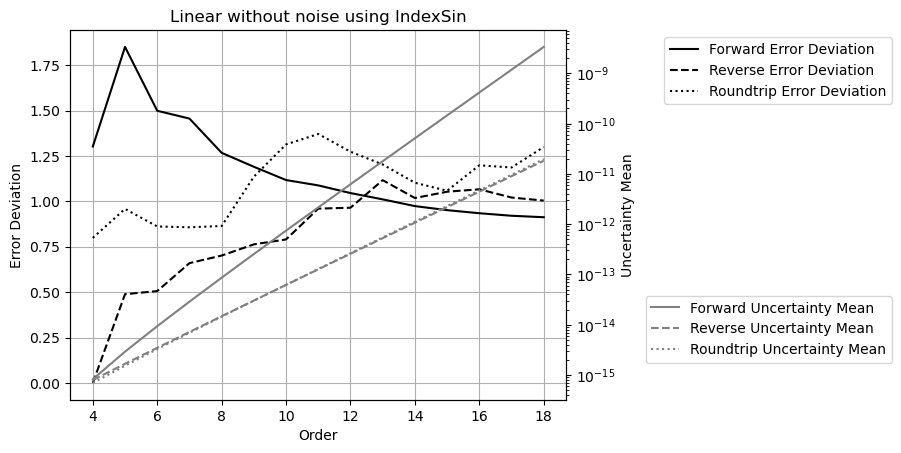

In [258]:
PlotVsOrder('IndexSin', 'Linear')

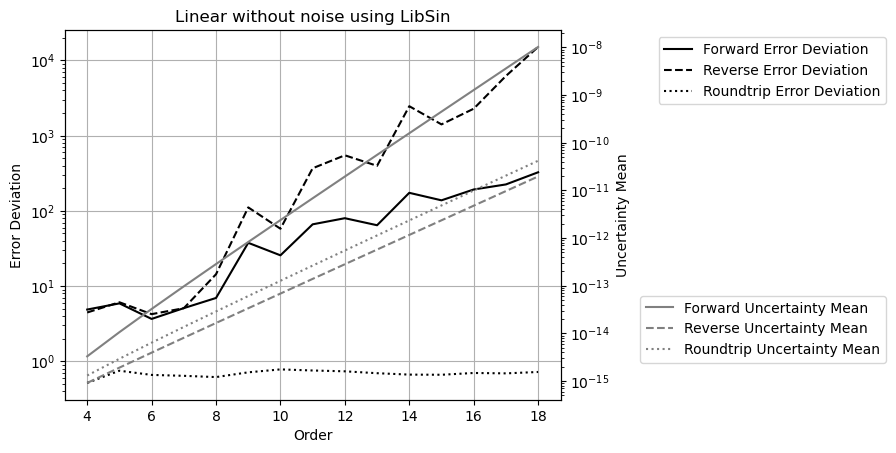

In [259]:
PlotVsOrder('LibSin', 'Linear', sLogy=(True, True))

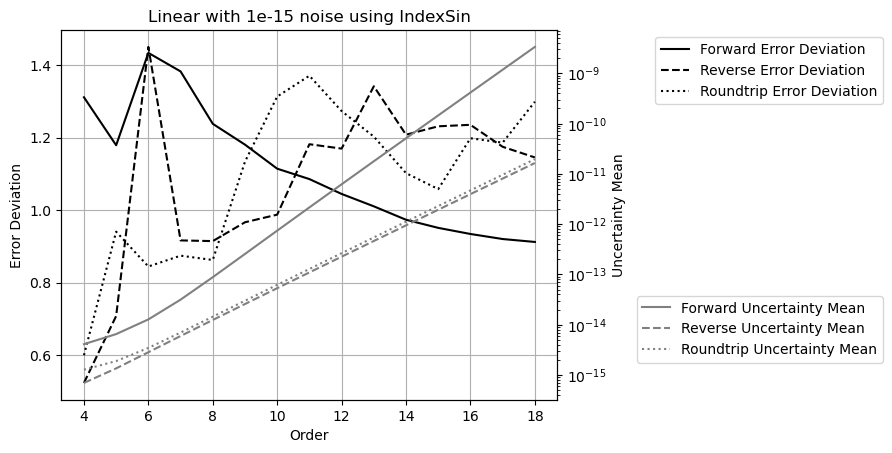

In [260]:
PlotVsOrder('IndexSin', 'Linear', noise=1e-15)

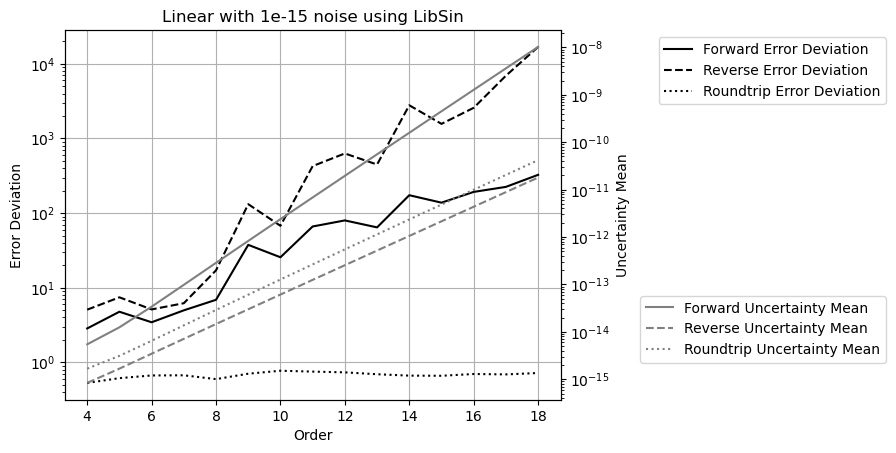

In [261]:
PlotVsOrder('LibSin', 'Linear', noise=1e-15, sLogy=(True, True))

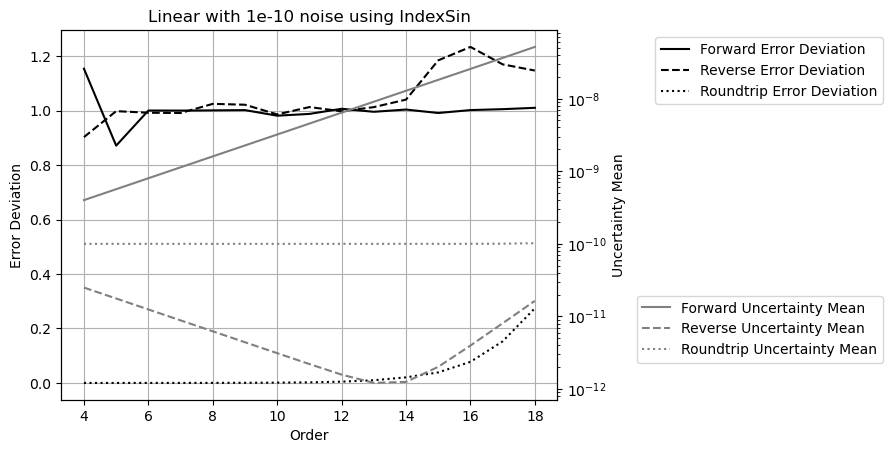

In [262]:
PlotVsOrder('IndexSin', 'Linear', noise=1e-10)

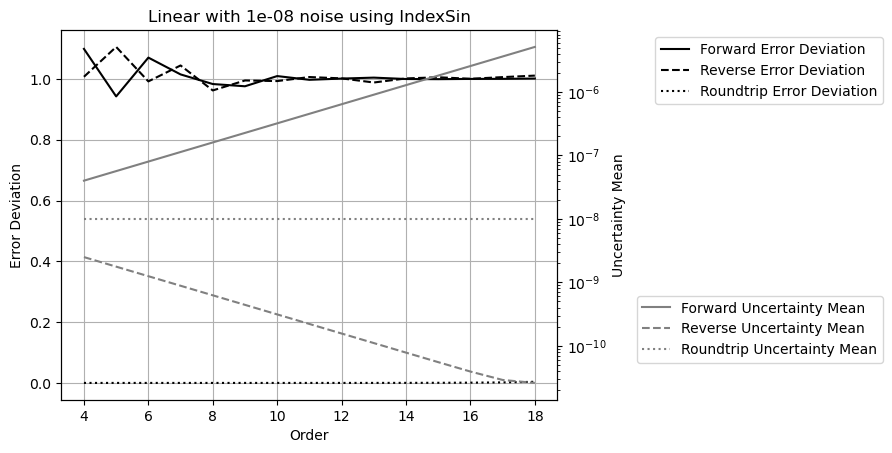

In [263]:
PlotVsOrder('IndexSin', 'Linear', noise=1e-8)

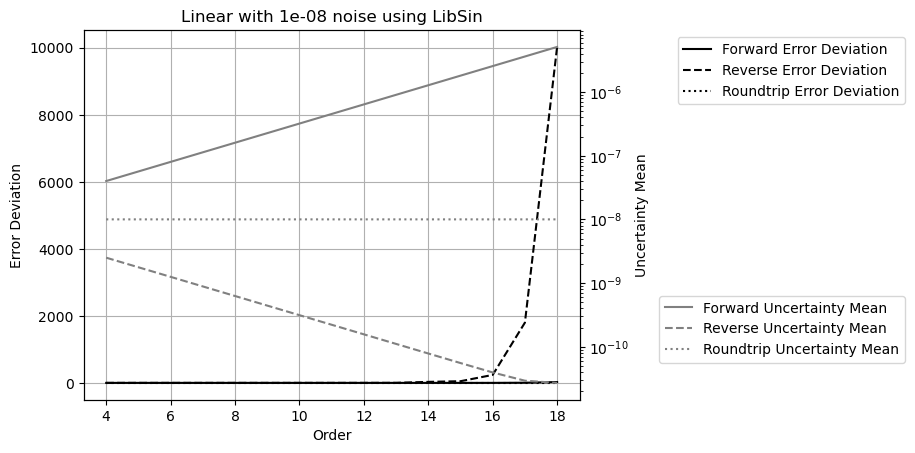

In [264]:
PlotVsOrder('LibSin', 'Linear', noise=1e-8)

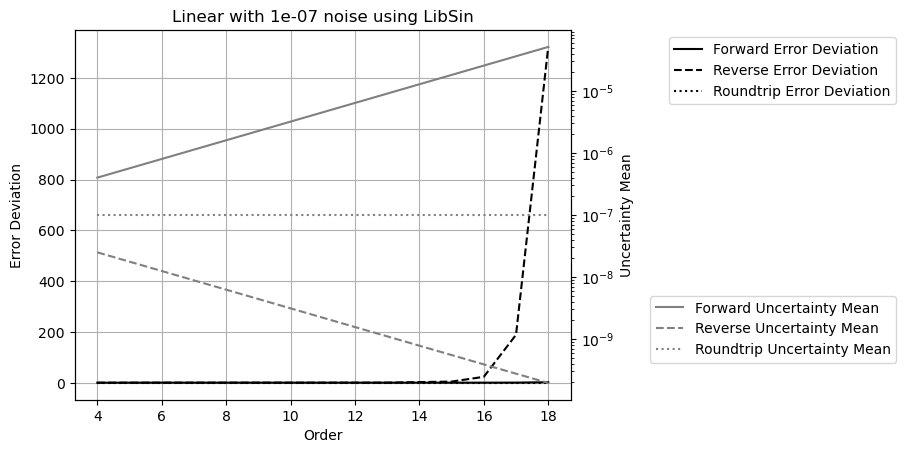

In [265]:
PlotVsOrder('LibSin', 'Linear', noise=1e-7)

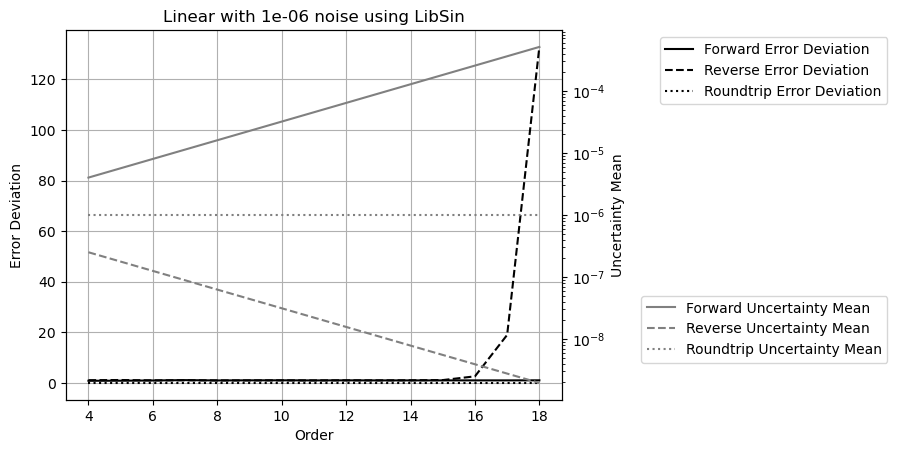

In [266]:
PlotVsOrder('LibSin', 'Linear', noise=1e-6)

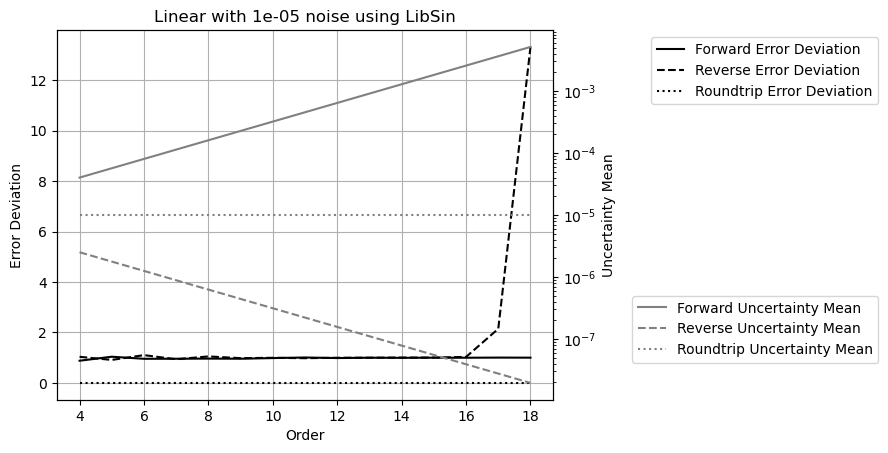

In [267]:
PlotVsOrder('LibSin', 'Linear', noise=1e-5)

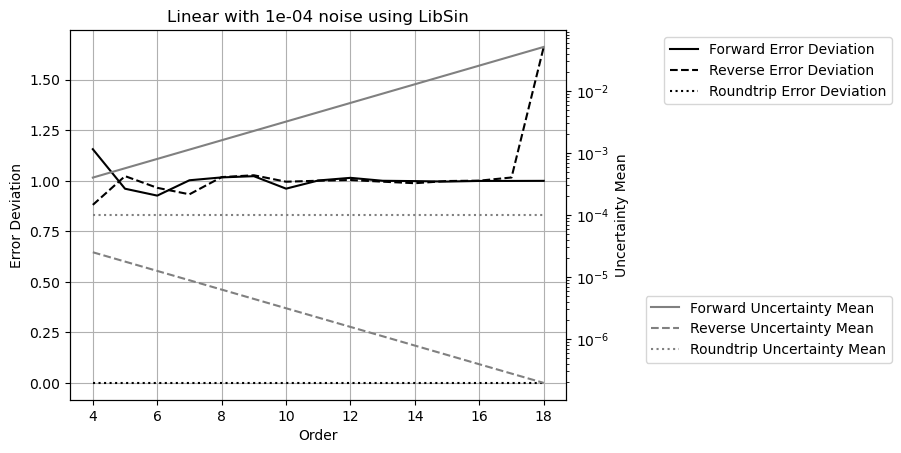

In [268]:
PlotVsOrder('LibSin', 'Linear', noise=1e-4)

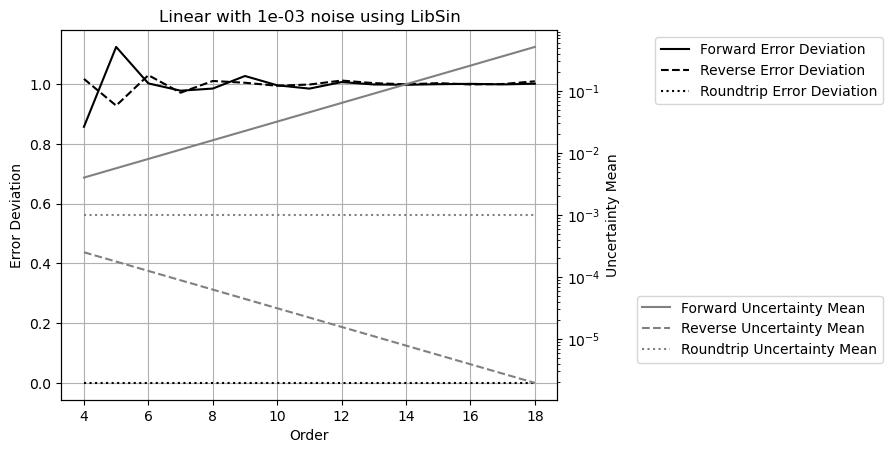

In [269]:
PlotVsOrder('LibSin', 'Linear', noise=1e-3)

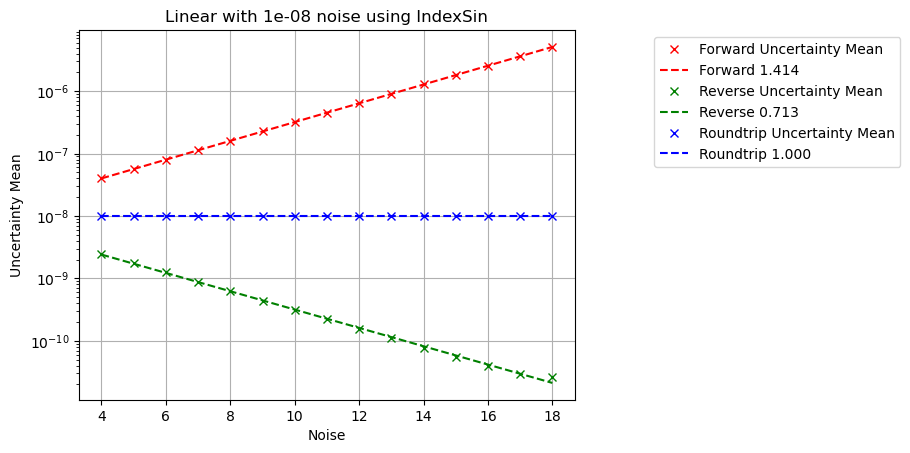

In [270]:
FitVsOrder('IndexSin', signal='Linear', noise=1e-8)

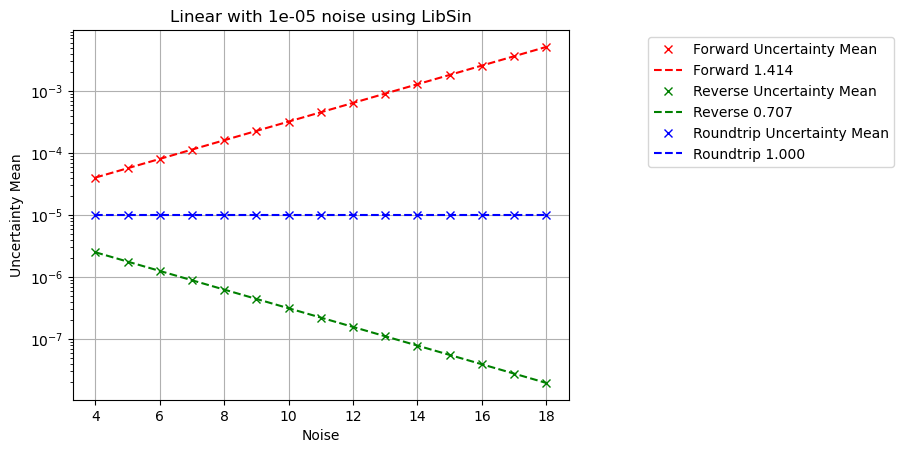

In [271]:
FitVsOrder('LibSin', signal='Linear', noise=1e-5)

# vs Noise

In [272]:
def PlotVsNoise( sinSource='IndexSin', signal='Aggr', freq=0, sTest=('Forward', 'Reverse', 'Roundtrip'), 
                 sValue=('Error Deviation', 'Uncertainty Mean'), 
                 sStyle=('-', '--'), sLogy=(False, True), sColor = ('r','g','b','y','c','r'), 
                 noiseType='Gaussian', order=ORDER ):
    
    fig, ax = plt.subplots()
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    ax.set_title(f'{signalName} vs noise using {sinSource}')
    ax.set_xlabel('Order')
    ax.set_xscale('log')
    ax.set_ylabel(sValue[0])
    if sLogy[0]:
        ax.set_yscale('log')
    plt.grid(True)
    
    ax2 = ax.twinx()
    ax2.set_ylabel(sValue[1])
    if sLogy[1]:
        ax2.set_yscale('log')
    
    for test, color in zip(sTest, sColor):
        dfPlot = df[(df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Freq']==freq) & (df['Test']==test) &
                    (df['NoiseType']==noiseType) & (df['Noise']!=0) & (df['Order']==order)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['Noise'], dfPlot[sValue[0]], ''.join([color, sStyle[0]]), label=f'{test} {sValue[0]}')
        ax2.plot(dfPlot['Noise'], dfPlot[sValue[1]], ''.join([color, sStyle[1]]), label=f'{test} {sValue[1]}')

    ax.legend(bbox_to_anchor=(1.65, 1.0))
    ax2.legend(bbox_to_anchor=(1.65, 0.3))

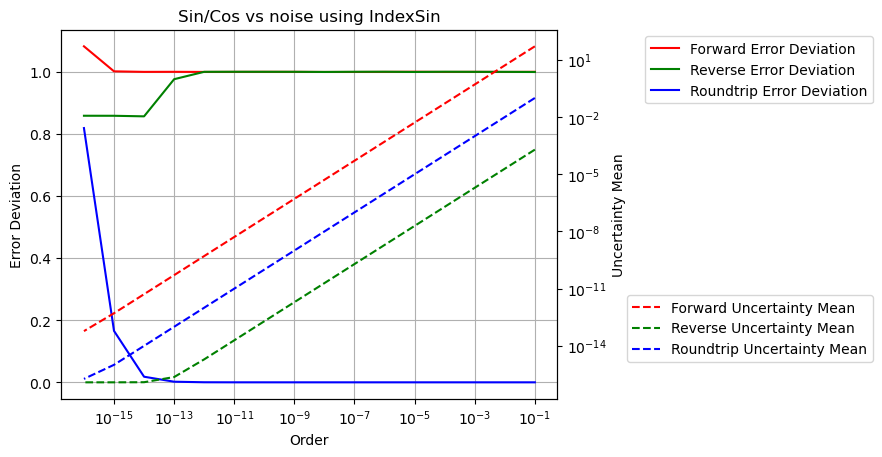

In [273]:
PlotVsNoise('IndexSin', 'Aggr')

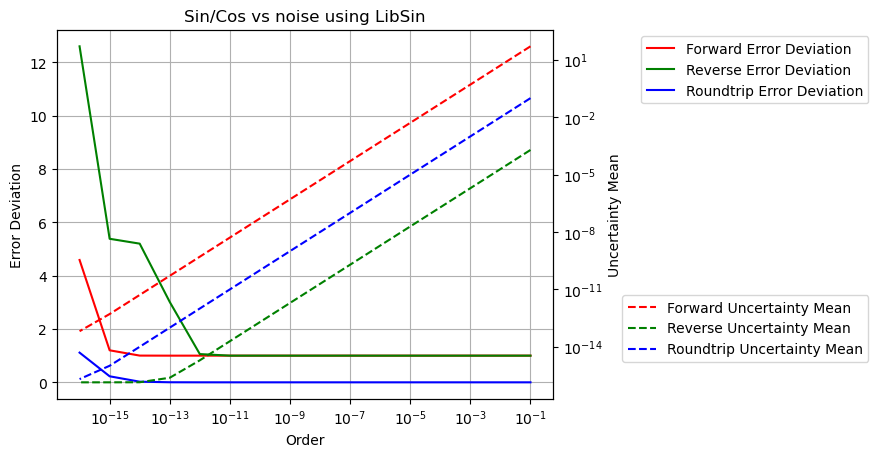

In [274]:
PlotVsNoise('LibSin', 'Aggr')

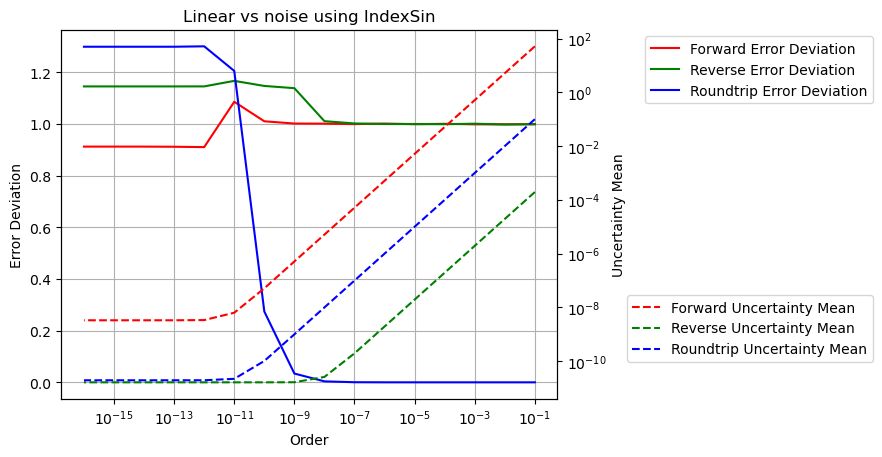

In [275]:
PlotVsNoise('IndexSin', 'Linear')

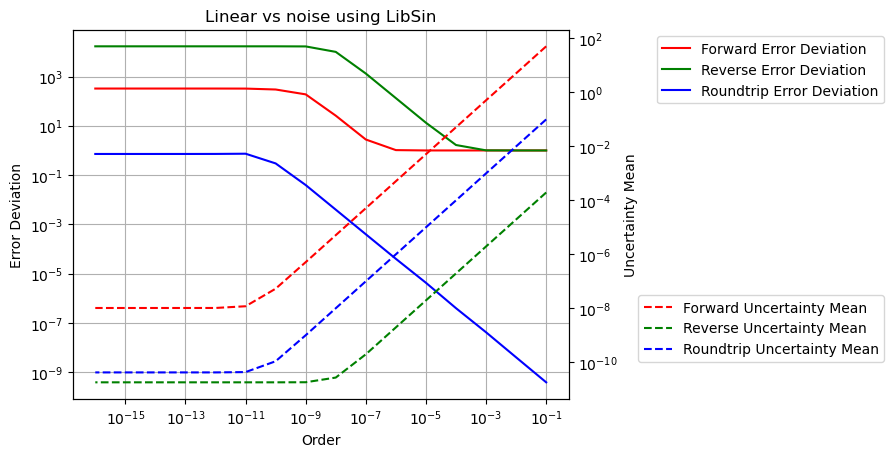

In [276]:
PlotVsNoise('LibSin', 'Linear', sLogy=(True, True))